# Group-6 Cohort project week-1
## Quantum Advantage, with Tensor Networks.

## Task 1 solution:
Extend this script to extract the coeﬃcients x|ψ for each bit-string x from the MPS.
Plot the probability of each x using a dot whose area is proportional to P (x), like in Fig. 1, for several circuit widths and depths.

Bonus:    Examine  the  change  in  the  bond  dimension  of  the  generated  MPS  as  the  random  circuits are  made  deeper.   Discuss  the  connection  to  entanglement  entropy.

In [1]:
# Loading the relevant packages
using Pkg
Pkg.add("PastaQ")
Pkg.add("ITensors")
Pkg.add("Plots")

    Fetching:

In [2]:
Pkg.add("ITensors")

In [3]:
Pkg.add("PyPlot")

### Defining the Task 1 Ion trap gates and functions

In [4]:
using PastaQ

function PastaQ.gate(::GateName"R"; theta::Real, phi::Real)
    [
        cos(theta/2)    (-im * exp(-im * phi) * sin(theta/2))
        (-im * exp(im * phi) * sin(theta/2))     cos(theta/2)
    ]
end

function PastaQ.gate(::GateName"M"; Theta::Real)
    [
        cos(Theta)    0    0    (-im * sin(Theta))
        0    cos(Theta)    (-im * sin(Theta))    0
        0    (-im * sin(Theta))    cos(Theta)    0
        (-im * sin(Theta))    0    0    cos(Theta)
    ]
end

function run(N, depth)
    # Random circuit.
    gates = Vector{Tuple}[]

    for i in 1:depth
        one_qubit_layer = Tuple[]
        two_qubit_layer = Tuple[]

        for j in 1:N
            gate = ("R", j, (theta=2pi*rand(), phi=2pi*rand()))
            push!(one_qubit_layer, gate)
        end

        # Alternate start qubit for pairs.
        idx_first = i % 2 + 1

        for j in idx_first:2:(N-1)
            gate = ("M", (j, j+1), (Theta=2pi*rand(),))
            push!(two_qubit_layer, gate)
        end

        push!(gates, one_qubit_layer)
        push!(gates, two_qubit_layer)
    end

    psi = runcircuit(N, gates)
end


ITensors.MPS
[1] IndexSet{2} (dim=2|id=219|"Qubit,Site,n=1") (dim=2|id=53|"Link,fact")
[2] IndexSet{3} (dim=2|id=53|"Link,fact") (dim=2|id=544|"Qubit,Site,n=2") (dim=4|id=491|"Link,fact")
[3] IndexSet{3} (dim=2|id=506|"Qubit,Site,n=3") (dim=4|id=491|"Link,fact") (dim=2|id=761|"Link,fact")
[4] IndexSet{2} (dim=2|id=761|"Link,fact") (dim=2|id=407|"Qubit,Site,n=4")


### Executing the circuit for various depths and widths: [N=3,D=3], [N=3, D=4], [N=3,D=5], [N=4,D=3], [N=4, D=4, [N=4,D=5].

In [125]:
N3 = 3 #parse(Int, ARGS[1])
depth3 = 3 #parse(Int, ARGS[2])
ψ3_3 = run(N3, depth3)

N3 = 3 #parse(Int, ARGS[1])
depth4 = 4 #parse(Int, ARGS[2])
ψ3_4 = run(N3, depth4)

N3 = 3 #parse(Int, ARGS[1])
depth5 = 5 #parse(Int, ARGS[2])
ψ3_5 = run(N3, depth5)

N4 = 4 #parse(Int, ARGS[1])
#depth4 = 4 #parse(Int, ARGS[2])
ψ4_3 = run(N4, depth3)

N4 = 4 #parse(Int, ARGS[1])
depth4 = 4 #parse(Int, ARGS[2])
ψ4_4 = run(N4, depth4)

N4 = 4 #parse(Int, ARGS[1])
depth4 = 5 #parse(Int, ARGS[2])
ψ4_5 = run(N4, depth5)

N4 =4
depth10 = 10
ψ4_10 = run(N4, depth10)

MPS
[1] IndexSet{2} (dim=2|id=739|"Qubit,Site,n=1") (dim=2|id=969|"Link,fact")
[2] IndexSet{3} (dim=2|id=969|"Link,fact") (dim=2|id=387|"Qubit,Site,n=2") (dim=4|id=373|"Link,fact")
[3] IndexSet{3} (dim=2|id=27|"Qubit,Site,n=3") (dim=4|id=373|"Link,fact") (dim=2|id=803|"Link,fact")
[4] IndexSet{2} (dim=2|id=803|"Link,fact") (dim=2|id=228|"Qubit,Site,n=4")


In [58]:
# Bases states for N= 3 qubits circuit
TT3 = [["Dn", "Dn", "Dn"];
 ["Dn", "Dn", "Up"];
 ["Dn", "Up", "Dn"];
 ["Dn", "Up", "Up"];
 ["Up", "Dn", "Dn"];
 ["Up", "Dn", "Up"];
 ["Up", "Up", "Dn"];
 ["Up", "Up", "Up"]]

24-element Vector{String}:
 "Dn"
 "Dn"
 "Dn"
 "Dn"
 "Dn"
 "Up"
 "Dn"
 "Up"
 "Dn"
 "Dn"
 "Up"
 "Up"
 "Up"
 "Dn"
 "Dn"
 "Up"
 "Dn"
 "Up"
 "Up"
 "Up"
 "Dn"
 "Up"
 "Up"
 "Up"

In [59]:
# Bases states for N= 4 qubits circuit
TT4 = [["Dn", "Dn", "Dn", "Dn"];
 ["Dn", "Dn", "Dn", "Up"];
 ["Dn", "Dn", "Up", "Dn"];
 ["Dn", "Dn", "Up", "Up"];
 ["Dn", "Up", "Dn", "Dn"];
 ["Dn", "Up", "Dn", "Up"];
 ["Dn", "Up", "Up", "Dn"];
 ["Dn", "Up", "Up", "Up"];
 ["Up", "Dn", "Dn", "Dn"];
 ["Up", "Dn", "Dn", "Up"];
 ["Up", "Dn", "Up", "Dn"];
 ["Up", "Dn", "Up", "Up"];
 ["Up", "Up", "Dn", "Dn"];
 ["Up", "Up", "Dn", "Up"];
 ["Up", "Up", "Up", "Dn"];
 ["Up", "Up", "Up", "Up"]]

64-element Vector{String}:
 "Dn"
 "Dn"
 "Dn"
 "Dn"
 "Dn"
 "Dn"
 "Dn"
 "Up"
 "Dn"
 "Dn"
 "Up"
 "Dn"
 "Dn"
 ⋮
 "Up"
 "Up"
 "Dn"
 "Up"
 "Up"
 "Up"
 "Up"
 "Dn"
 "Up"
 "Up"
 "Up"
 "Up"

## Circuit N=3, depth = 3

In [63]:
using ITensors
sites3 = siteinds("S=1/2",N3)
p3_3 = zeros(8)
for i in 1:3:24
    states3 = TT3[i:i+2]
    x3 = productMPS(sites3, states3)
    ii = i÷3 + 1
    #println(ii)
    #println(xxx)
    # Here is where the width and depth matters
    A3_3 = dot(x3,ψ3_3) 
    #println("Amplitude : ",A)
    p3_3[ii] = real(A3_3)^2 + imag(A3_3)^2
    #println("Probability : ",p)
end

In [64]:
println("probability for each base state <x| = ",p3_3)

probability for each base state <x| = [0.24912873411721628, 0.250210811252279, 0.04722110583337227, 0.016486203614432503, 0.0689346046050677, 0.1651579254696485, 0.0322197495822404, 0.17064086552574345]


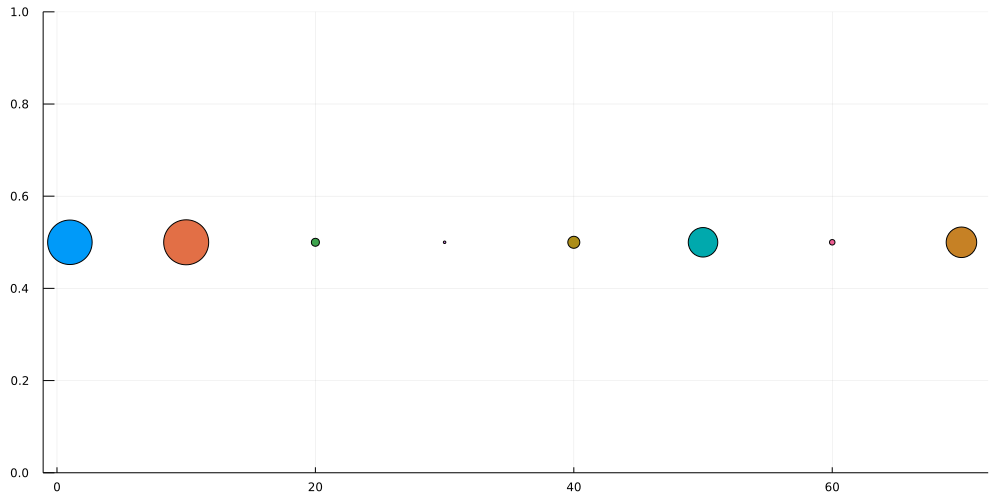

In [119]:
using Plots;
plot!()
scatter([1],[0.5],markersize= p3_3[1]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([10],[0.5],markersize= p3_3[2]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([20],[0.5],markersize= p3_3[3]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([30],[0.5],markersize= p3_3[4]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([40],[0.5],markersize= p3_3[5]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([50],[0.5],markersize= p3_3[6]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([60],[0.5],markersize= p3_3[7]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([70],[0.5],markersize= p3_3[8]*100,legend = false,size=(500,500),ylims=(0,1))
plot!(size=(1000,500))

## Circuit N=3, depth = 4

In [66]:
using ITensors
sites3 = siteinds("S=1/2",N3)
p3_4 = zeros(8)
for i in 1:3:24
    states3 = TT3[i:i+2]
    x3 = productMPS(sites3, states3)
    ii = i÷3 + 1
    #println(ii)
    #println(xxx)
    # Here is where the width and depth matters
    A3_4 = dot(x3,ψ3_4) 
    #println("Amplitude : ",A)
    p3_4[ii] = real(A3_4)^2 + imag(A3_4)^2
    #println("Probability : ",p)
end

In [87]:
println("probability for each base state <x| = ",p3_4)

probability for each base state <x| = [0.004188917079803631, 0.14882805528527002, 0.011685523817539711, 0.21197192362485315, 0.07002755542146513, 0.19822233716469906, 0.07407415080269074, 0.28100153680367773]


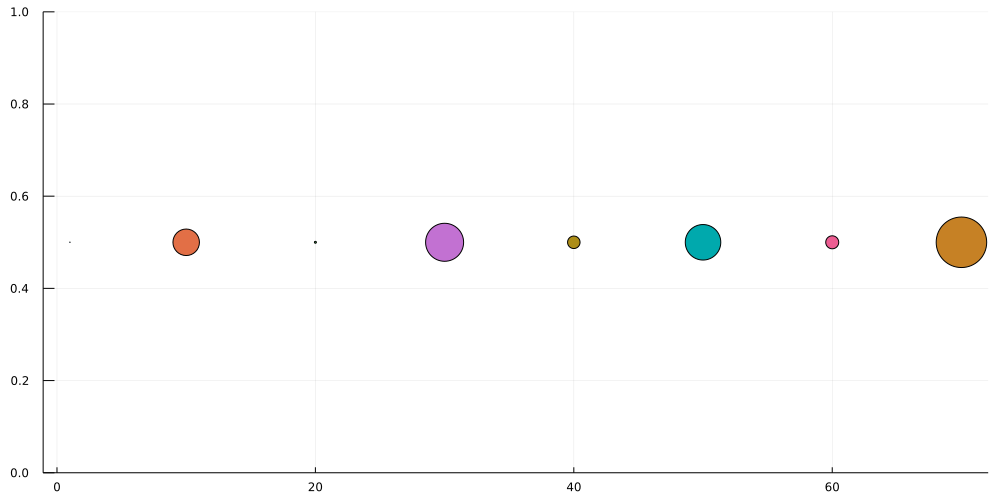

In [118]:
using Plots;
plot!()
scatter([1],[0.5],markersize= p3_4[1]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([10],[0.5],markersize= p3_4[2]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([20],[0.5],markersize= p3_4[3]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([30],[0.5],markersize= p3_4[4]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([40],[0.5],markersize= p3_4[5]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([50],[0.5],markersize= p3_4[6]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([60],[0.5],markersize= p3_4[7]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([70],[0.5],markersize= p3_4[8]*100,legend = false,size=(500,500),ylims=(0,1))
plot!(size=(1000,500))

## Circuit N=3, depth = 5

In [86]:
using ITensors
sites3 = siteinds("S=1/2",N3)
p3_5 = zeros(8)
for i in 1:3:24
    states3 = TT3[i:i+2]
    x3 = productMPS(sites3, states3)
    ii = i÷3 + 1
    #println(ii)
    #println(xxx)
    # Here is where the width and depth matters
    A3_5 = dot(x3,ψ3_5) 
    #println("Amplitude : ",A)
    p3_5[ii] = real(A3_5)^2 + imag(A3_5)^2
    #println("Probability : ",p)
end


In [88]:
println("probability for each base state <x| = ",p3_5)

probability for each base state <x| = [0.3490596987275233, 0.04816115618238169, 0.09402923587196227, 0.17328948690287233, 0.038669836297139215, 0.003946156465643684, 0.22667298100069513, 0.06617144855178383]


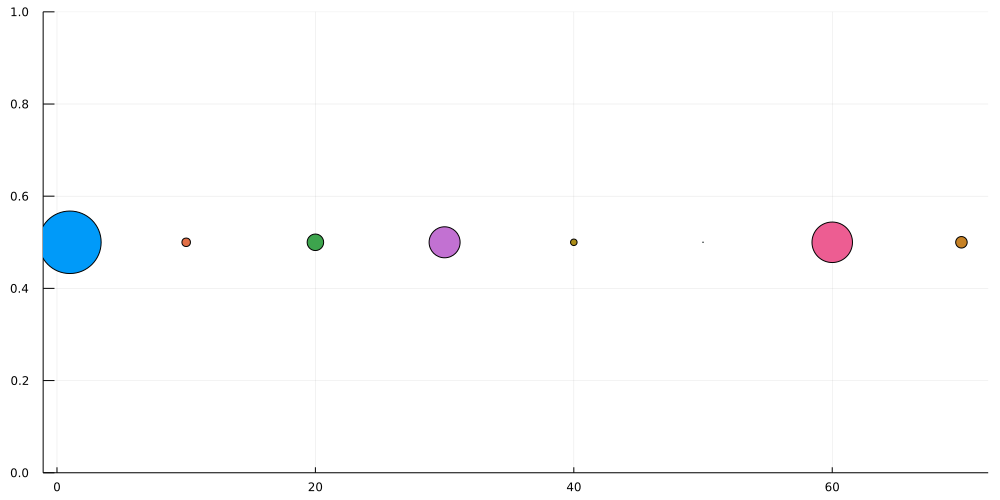

In [117]:
using Plots;
plot!()
scatter([1],[0.5],markersize= p3_5[1]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([10],[0.5],markersize= p3_5[2]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([20],[0.5],markersize= p3_5[3]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([30],[0.5],markersize= p3_5[4]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([40],[0.5],markersize= p3_5[5]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([50],[0.5],markersize= p3_5[6]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([60],[0.5],markersize= p3_5[7]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([70],[0.5],markersize= p3_5[8]*100,legend = false,size=(500,500),ylims=(0,1))
plot!(size=(1000,500))

## Circuit N=4, depth =4

In [60]:
using ITensors
N4 = 4
sites4 = siteinds("S=1/2",N4)
#p{Float64}(nothing, 16)
#p{Float64}(undef,16)
p4_4 = zeros(16)
for i in 1:4:64
    #println(i)
    #print(TT[i:i+3])
    states4 = TT4[i:i+3]
    x4 = productMPS(sites4, states4)
    ii = i÷4 + 1
    #println(ii)
    #println(xxx)
    # Here is where the width and depth matters
    A4_4 = dot(x4,ψ4_4) 
    #println("Amplitude : ",A)
    p4_4[ii] = real(A4_4)^2 + imag(A4_4)^2
    #println("Probability : ",p)
end

### Probabilities for each base state <x|

In [61]:
println("probability for each base state <x| = ",p4_4)

probability for each base state <x| = [0.11674727669716826, 0.1095837353211021, 0.015756143838782433, 0.03087428864201501, 0.02188916989498861, 0.004982866382150551, 0.013705702752588648, 0.06742597982969285, 0.16658539388499874, 0.1254312854145359, 0.04573044351194156, 0.04234735344935512, 0.06891816601170105, 0.02820245422882694, 0.016711614083011153, 0.12510812605713792]


### Plot with the probabilities of each <x| a dot whose area is proportional to P(x)

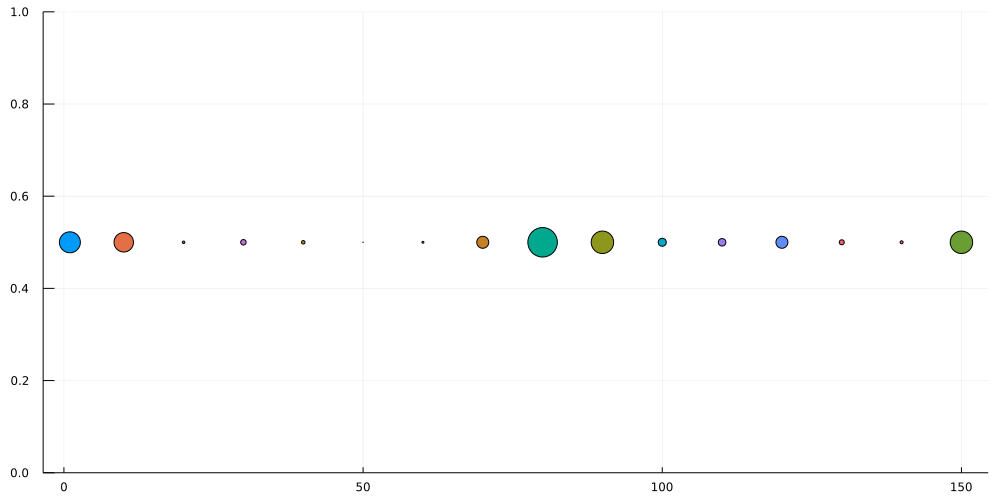

In [121]:
using Plots;
plot!()
scatter([1],[0.5],markersize= p4_4[1]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([10],[0.5],markersize= p4_4[2]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([20],[0.5],markersize= p4_4[3]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([30],[0.5],markersize= p4_4[4]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([40],[0.5],markersize= p4_4[5]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([50],[0.5],markersize= p4_4[6]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([60],[0.5],markersize= p4_4[7]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([70],[0.5],markersize= p4_4[8]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([80],[0.5],markersize= p4_4[9]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([90],[0.5],markersize= p4_4[10]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([100],[0.5],markersize= p4_4[11]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([110],[0.5],markersize= p4_4[12]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([120],[0.5],markersize= p4_4[13]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([130],[0.5],markersize= p4_4[14]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([140],[0.5],markersize= p4_4[15]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([150],[0.5],markersize= p4_4[16]*100,legend = false,size=(500,500),ylims=(0,1))
plot!(size=(1000,500))

## Circuit N=4, depth =5

In [122]:
using ITensors
N4 = 4
sites4 = siteinds("S=1/2",N4)
#p{Float64}(nothing, 16)
#p{Float64}(undef,16)
p4_5 = zeros(16)
for i in 1:4:64
    #println(i)
    #print(TT[i:i+3])
    states4 = TT4[i:i+3]
    x4 = productMPS(sites4, states4)
    ii = i÷4 + 1
    #println(ii)
    #println(xxx)
    # Here is where the width and depth matters
    A4_5 = dot(x4,ψ4_5) 
    #println("Amplitude : ",A)
    p4_5[ii] = real(A4_5)^2 + imag(A4_5)^2
    #println("Probability : ",p)
end

In [123]:
println("probability for each base state <x| = ",p4_5)

probability for each base state <x| = [0.19989317161304418, 0.08982119647561737, 0.014231799663088992, 0.06146265244683545, 0.2766222173799328, 0.13186329511763892, 0.0169777025214659, 0.04585884916998359, 0.02496349315675242, 0.00413230504377829, 0.001610170146161525, 0.0479828851217048, 0.029315127817722275, 0.03308651803249969, 0.012186898479562775, 0.009991717814211844]


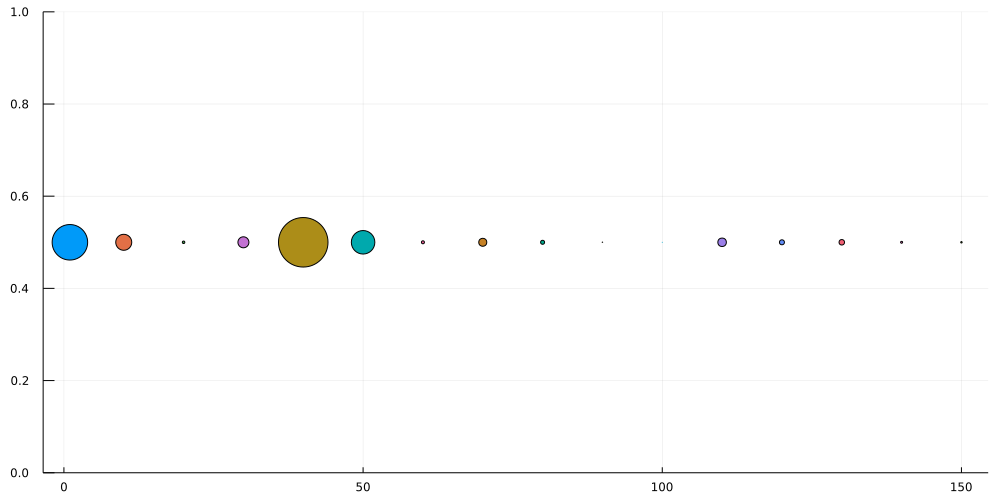

In [124]:
using Plots;
plot!()
scatter([1],[0.5],markersize= p4_5[1]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([10],[0.5],markersize= p4_5[2]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([20],[0.5],markersize= p4_5[3]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([30],[0.5],markersize= p4_5[4]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([40],[0.5],markersize= p4_5[5]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([50],[0.5],markersize= p4_5[6]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([60],[0.5],markersize= p4_5[7]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([70],[0.5],markersize= p4_5[8]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([80],[0.5],markersize= p4_5[9]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([90],[0.5],markersize= p4_5[10]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([100],[0.5],markersize= p4_5[11]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([110],[0.5],markersize= p4_5[12]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([120],[0.5],markersize= p4_5[13]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([130],[0.5],markersize= p4_5[14]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([140],[0.5],markersize= p4_5[15]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([150],[0.5],markersize= p4_5[16]*100,legend = false,size=(500,500),ylims=(0,1))
plot!(size=(1000,500))

## Circuit N=4, depth =10

In [126]:
using ITensors
N4 = 4
sites4 = siteinds("S=1/2",N4)
#p{Float64}(nothing, 16)
#p{Float64}(undef,16)
p4_10 = zeros(16)
for i in 1:4:64
    #println(i)
    #print(TT[i:i+3])
    states4 = TT4[i:i+3]
    x4 = productMPS(sites4, states4)
    ii = i÷4 + 1
    #println(ii)
    #println(xxx)
    # Here is where the width and depth matters
    A4_10 = dot(x4,ψ4_10) 
    #println("Amplitude : ",A)
    p4_10[ii] = real(A4_10)^2 + imag(A4_10)^2
    #println("Probability : ",p)
end

In [127]:
println("probability for each base state <x| = ",p4_10)

probability for each base state <x| = [0.021522342415905726, 0.025755520369288316, 0.05238651824239654, 0.030978186154010677, 0.043214802351912204, 0.030650908950455562, 0.062496290708122924, 0.40751731779234457, 0.06740955895524278, 0.02834906784489781, 0.11393631988503312, 0.011114524400750102, 0.01722064352100918, 0.004620592240482746, 0.0022683706519852275, 0.0805590355161606]


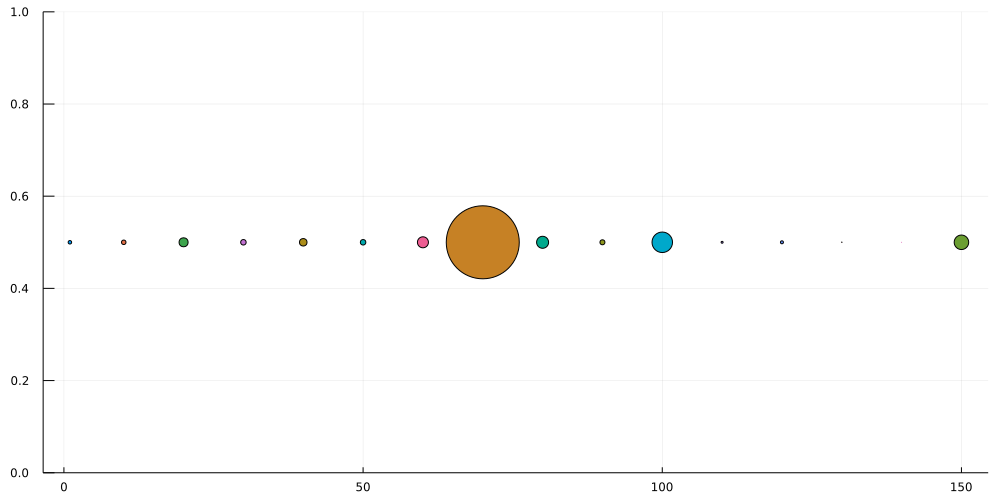

In [128]:
using Plots;
plot!()
scatter([1],[0.5],markersize= p4_10[1]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([10],[0.5],markersize= p4_10[2]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([20],[0.5],markersize= p4_10[3]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([30],[0.5],markersize= p4_10[4]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([40],[0.5],markersize= p4_10[5]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([50],[0.5],markersize= p4_10[6]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([60],[0.5],markersize= p4_10[7]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([70],[0.5],markersize= p4_10[8]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([80],[0.5],markersize= p4_10[9]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([90],[0.5],markersize= p4_10[10]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([100],[0.5],markersize= p4_10[11]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([110],[0.5],markersize= p4_10[12]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([120],[0.5],markersize= p4_10[13]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([130],[0.5],markersize= p4_10[14]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([140],[0.5],markersize= p4_10[15]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([150],[0.5],markersize= p4_10[16]*100,legend = false,size=(500,500),ylims=(0,1))
plot!(size=(1000,500))

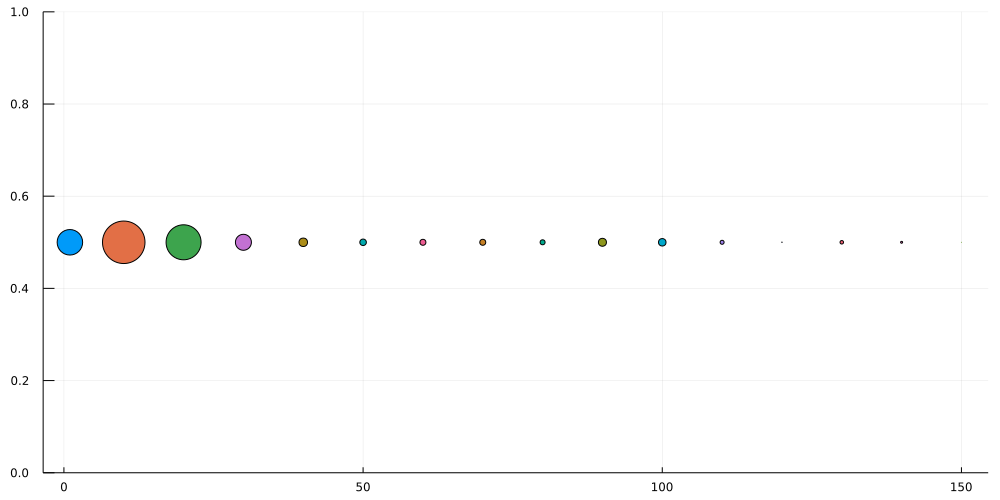

In [116]:
using Plots;
plot!()
scatter([1],[0.5],markersize= p[1]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([10],[0.5],markersize= p[2]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([20],[0.5],markersize= p[3]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([30],[0.5],markersize= p[4]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([40],[0.5],markersize= p[5]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([50],[0.5],markersize= p[6]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([60],[0.5],markersize= p[7]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([70],[0.5],markersize= p[8]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([80],[0.5],markersize= p[9]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([90],[0.5],markersize= p[10]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([100],[0.5],markersize= p[11]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([110],[0.5],markersize= p[12]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([120],[0.5],markersize= p[13]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([130],[0.5],markersize= p[14]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([140],[0.5],markersize= p[15]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([150],[0.5],markersize= p[16]*100,legend = false,size=(500,500),ylims=(0,1))
plot!(size=(1000,500))

## All plots toguether with gate cases [N=3,D=3], [N=3,D=4],[N-3,D=5]

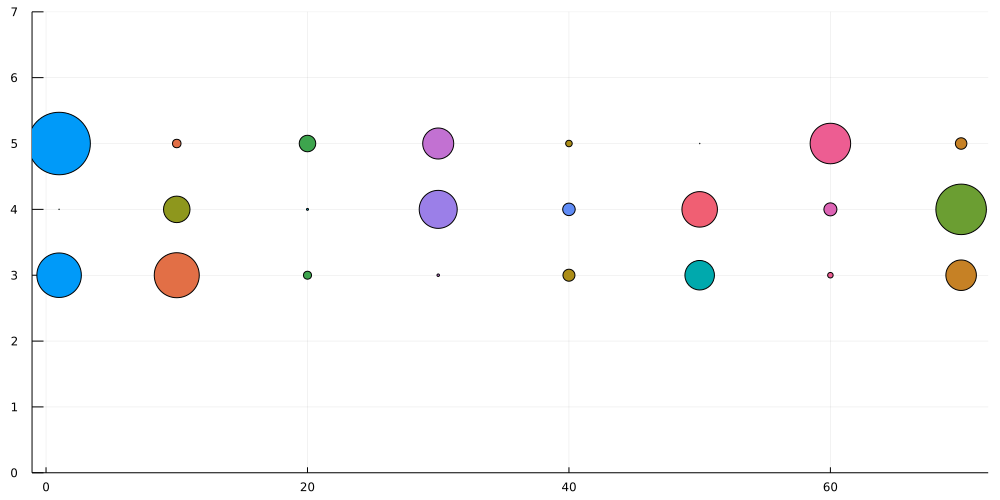

In [120]:
using Plots;
plot!()
scatter([1],[3],markersize= p3_3[1]*100,legend = false,size=(500,500),ylims=(0,7))
scatter!([10],[3],markersize= p3_3[2]*100,legend = false,size=(500,500),ylims=(0,7))
scatter!([20],[3],markersize= p3_3[3]*100,legend = false,size=(500,500),ylims=(0,7))
scatter!([30],[3],markersize= p3_3[4]*100,legend = false,size=(500,500),ylims=(0,7))
scatter!([40],[3],markersize= p3_3[5]*100,legend = false,size=(500,500),ylims=(0,7))
scatter!([50],[3],markersize= p3_3[6]*100,legend = false,size=(500,500),ylims=(0,7))
scatter!([60],[3],markersize= p3_3[7]*100,legend = false,size=(500,500),ylims=(0,7))
scatter!([70],[3],markersize= p3_3[8]*100,legend = false,size=(500,500),ylims=(0,7))
###
scatter!([1],[4],markersize= p3_4[1]*100,legend = false,size=(500,500),ylims=(0,7))
scatter!([10],[4],markersize= p3_4[2]*100,legend = false,size=(500,500),ylims=(0,7))
scatter!([20],[4],markersize= p3_4[3]*100,legend = false,size=(500,500),ylims=(0,7))
scatter!([30],[4],markersize= p3_4[4]*100,legend = false,size=(500,500),ylims=(0,7))
scatter!([40],[4],markersize= p3_4[5]*100,legend = false,size=(500,500),ylims=(0,7))
scatter!([50],[4],markersize= p3_4[6]*100,legend = false,size=(500,500),ylims=(0,7))
scatter!([60],[4],markersize= p3_4[7]*100,legend = false,size=(500,500),ylims=(0,7))
scatter!([70],[4],markersize= p3_4[8]*100,legend = false,size=(500,500),ylims=(0,7))
###
scatter!([1],[5],markersize= p3_5[1]*100,legend = false,size=(500,500),ylims=(0,7))
scatter!([10],[5],markersize= p3_5[2]*100,legend = false,size=(500,500),ylims=(0,7))
scatter!([20],[5],markersize= p3_5[3]*100,legend = false,size=(500,500),ylims=(0,7))
scatter!([30],[5],markersize= p3_5[4]*100,legend = false,size=(500,500),ylims=(0,7))
scatter!([40],[5],markersize= p3_5[5]*100,legend = false,size=(500,500),ylims=(0,7))
scatter!([50],[5],markersize= p3_5[6]*100,legend = false,size=(500,500),ylims=(0,7))
scatter!([60],[5],markersize= p3_5[7]*100,legend = false,size=(500,500),ylims=(0,7))
scatter!([70],[5],markersize= p3_5[8]*100,legend = false,size=(500,500),ylims=(0,7))
plot!(size=(1000,500))

## All plots toguether with gate cases [N=4,D=4], [N=4,D=5],[N=4,D=10]

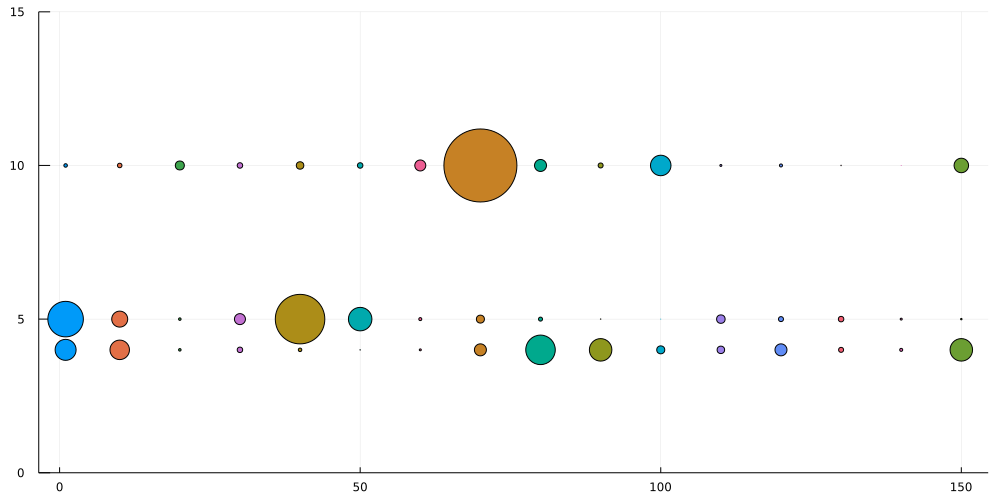

In [130]:
# using Plots;
### N=4 D=4
plot!()
scatter([1],[4],markersize= p4_4[1]*100,legend = false,size=(500,500),ylims=(0,15))
scatter!([10],[4],markersize= p4_4[2]*100,legend = false,size=(500,500),ylims=(0,15))
scatter!([20],[4],markersize= p4_4[3]*100,legend = false,size=(500,500),ylims=(0,15))
scatter!([30],[4],markersize= p4_4[4]*100,legend = false,size=(500,500),ylims=(0,15))
scatter!([40],[4],markersize= p4_4[5]*100,legend = false,size=(500,500),ylims=(0,15))
scatter!([50],[4],markersize= p4_4[6]*100,legend = false,size=(500,500),ylims=(0,15))
scatter!([60],[4],markersize= p4_4[7]*100,legend = false,size=(500,500),ylims=(0,15))
scatter!([70],[4],markersize= p4_4[8]*100,legend = false,size=(500,500),ylims=(0,15))
scatter!([80],[4],markersize= p4_4[9]*100,legend = false,size=(500,500),ylims=(0,15))
scatter!([90],[4],markersize= p4_4[10]*100,legend = false,size=(500,500),ylims=(0,15))
scatter!([100],[4],markersize= p4_4[11]*100,legend = false,size=(500,500),ylims=(0,15))
scatter!([110],[4],markersize= p4_4[12]*100,legend = false,size=(500,500),ylims=(0,15))
scatter!([120],[4],markersize= p4_4[13]*100,legend = false,size=(500,500),ylims=(0,15))
scatter!([130],[4],markersize= p4_4[14]*100,legend = false,size=(500,500),ylims=(0,15))
scatter!([140],[4],markersize= p4_4[15]*100,legend = false,size=(500,500),ylims=(0,15))
scatter!([150],[4],markersize= p4_4[16]*100,legend = false,size=(500,500),ylims=(0,15))
###
### N=4, D=5
scatter!([1],[5],markersize= p4_5[1]*100,legend = false,size=(500,500),ylims=(0,15))
scatter!([10],[5],markersize= p4_5[2]*100,legend = false,size=(500,500),ylims=(0,15))
scatter!([20],[5],markersize= p4_5[3]*100,legend = false,size=(500,500),ylims=(0,15))
scatter!([30],[5],markersize= p4_5[4]*100,legend = false,size=(500,500),ylims=(0,15))
scatter!([40],[5],markersize= p4_5[5]*100,legend = false,size=(500,500),ylims=(0,15))
scatter!([50],[5],markersize= p4_5[6]*100,legend = false,size=(500,500),ylims=(0,15))
scatter!([60],[5],markersize= p4_5[7]*100,legend = false,size=(500,500),ylims=(0,15))
scatter!([70],[5],markersize= p4_5[8]*100,legend = false,size=(500,500),ylims=(0,15))
scatter!([80],[5],markersize= p4_5[9]*100,legend = false,size=(500,500),ylims=(0,15))
scatter!([90],[5],markersize= p4_5[10]*100,legend = false,size=(500,500),ylims=(0,15))
scatter!([100],[5],markersize= p4_5[11]*100,legend = false,size=(500,500),ylims=(0,15))
scatter!([110],[5],markersize= p4_5[12]*100,legend = false,size=(500,500),ylims=(0,15))
scatter!([120],[5],markersize= p4_5[13]*100,legend = false,size=(500,500),ylims=(0,15))
scatter!([130],[5],markersize= p4_5[14]*100,legend = false,size=(500,500),ylims=(0,15))
scatter!([140],[5],markersize= p4_5[15]*100,legend = false,size=(500,500),ylims=(0,15))
scatter!([150],[5],markersize= p4_5[16]*100,legend = false,size=(500,500),ylims=(0,15))
###
### N=4, D=10
scatter!([1],[10],markersize= p4_10[1]*100,legend = false,size=(500,500),ylims=(0,15))
scatter!([10],[10],markersize= p4_10[2]*100,legend = false,size=(500,500),ylims=(0,15))
scatter!([20],[10],markersize= p4_10[3]*100,legend = false,size=(500,500),ylims=(0,15))
scatter!([30],[10],markersize= p4_10[4]*100,legend = false,size=(500,500),ylims=(0,15))
scatter!([40],[10],markersize= p4_10[5]*100,legend = false,size=(500,500),ylims=(0,15))
scatter!([50],[10],markersize= p4_10[6]*100,legend = false,size=(500,500),ylims=(0,15))
scatter!([60],[10],markersize= p4_10[7]*100,legend = false,size=(500,500),ylims=(0,15))
scatter!([70],[10],markersize= p4_10[8]*100,legend = false,size=(500,500),ylims=(0,15))
scatter!([80],[10],markersize= p4_10[9]*100,legend = false,size=(500,500),ylims=(0,15))
scatter!([90],[10],markersize= p4_10[10]*100,legend = false,size=(500,500),ylims=(0,15))
scatter!([100],[10],markersize= p4_10[11]*100,legend = false,size=(500,500),ylims=(0,15))
scatter!([110],[10],markersize= p4_10[12]*100,legend = false,size=(500,500),ylims=(0,15))
scatter!([120],[10],markersize= p4_10[13]*100,legend = false,size=(500,500),ylims=(0,15))
scatter!([130],[10],markersize= p4_10[14]*100,legend = false,size=(500,500),ylims=(0,15))
scatter!([140],[10],markersize= p4_10[15]*100,legend = false,size=(500,500),ylims=(0,15))
scatter!([150],[10],markersize= p4_10[16]*100,legend = false,size=(500,500),ylims=(0,15))
plot!(size=(1000,500))

## Conclusion for Task 1:
I can see that there is some pattern formed by the probabilities of the wavefunction state when calculated with respect to the different base states, the patterns formed are like wave packects, for instance when N=4, D=4. This pattern gets squezeed when the depht pf the circuit increases.

## Task 2 solution:
Run one random circuit multiple times, but with a single bit-ﬂip error at a random location in the circuit each time. The resulting speckle patterns should all be quite diﬀerent; collect them into a collage.

In [90]:
using PastaQ

# New function with the flipflop gate
function PastaQ.gate(::GateName"Sx" )
    [
        0    1
        1    0
    ]
end

function PastaQ.gate(::GateName"R"; theta::Real, phi::Real)
    [
        cos(theta/2)    (-im * exp(-im * phi) * sin(theta/2))
        (-im * exp(im * phi) * sin(theta/2))     cos(theta/2)
    ]
end

function PastaQ.gate(::GateName"M"; Theta::Real)
    [
        cos(Theta)    0    0    (-im * sin(Theta))
        0    cos(Theta)    (-im * sin(Theta))    0
        0    (-im * sin(Theta))    cos(Theta)    0
        (-im * sin(Theta))    0    0    cos(Theta)
    ]
end

function run_with_noise(N, depth)
    # Random circuit.
    gates = Vector{Tuple}[]

    for i in 1:depth
        one_qubit_layer = Tuple[]
        two_qubit_layer = Tuple[]

        for j in 1:N
            gate = ("R", j, (theta=2pi*rand(), phi=2pi*rand()))
            push!(one_qubit_layer, gate)
        end
        ##  Modification with the bit-flip gate
        for j in 1:N
            gate = ("S", j)
            push!(one_qubit_layer, gate)
        end

        # Alternate start qubit for pairs.
        idx_first = i % 2 + 1

        for j in idx_first:2:(N-1)
            gate = ("M", (j, j+1), (Theta=2pi*rand(),))
            push!(two_qubit_layer, gate)
        end

        push!(gates, one_qubit_layer)
        push!(gates, two_qubit_layer)
    end

    psi = runcircuit(N, gates)
end


run_with_noise (generic function with 1 method)

In [91]:
N3 = 3 #parse(Int, ARGS[1])
depth3 = 3 #parse(Int, ARGS[2])
ψ3_3_E = run_with_noise(N3, depth3)

N3 = 3 #parse(Int, ARGS[1])
depth4 = 4 #parse(Int, ARGS[2])
ψ3_4_E = run_with_noise(N3, depth4)

N3 = 3 #parse(Int, ARGS[1])
depth5 = 5 #parse(Int, ARGS[2])
ψ3_5_E = run_with_noise(N3, depth5)

N4 = 4 #parse(Int, ARGS[1])
#depth4 = 4 #parse(Int, ARGS[2])
ψ4_3_E = run_with_noise(N4, depth3)

N4 = 4 #parse(Int, ARGS[1])
depth4 = 4 #parse(Int, ARGS[2])
ψ4_4_E = run_with_noise(N4, depth4)

N4 = 4 #parse(Int, ARGS[1])
depth4 = 5 #parse(Int, ARGS[2])
ψ4_5_E = run_with_noise(N4, depth5)

MPS
[1] IndexSet{2} (dim=2|id=312|"Qubit,Site,n=1") (dim=2|id=212|"Link,fact")
[2] IndexSet{3} (dim=2|id=689|"Qubit,Site,n=2") (dim=2|id=212|"Link,fact") (dim=4|id=419|"Link,fact")
[3] IndexSet{3} (dim=4|id=419|"Link,fact") (dim=2|id=353|"Qubit,Site,n=3") (dim=2|id=958|"Link,fact")
[4] IndexSet{2} (dim=2|id=283|"Qubit,Site,n=4") (dim=2|id=958|"Link,fact")


## Computing the circuit with the bit-flip error gate N=3, depth = 3

In [99]:
using ITensors
sites3 = siteinds("S=1/2",N3)
p3_3_E = zeros(8)
for i in 1:3:24
    states3 = TT3[i:i+2]
    x3 = productMPS(sites3, states3)
    ii = i÷3 + 1
    #println(ii)
    #println(xxx)
    # Here is where the width and depth matters
    A3_3_E = dot(x3,ψ3_3_E) 
    #println("Amplitude : ",A)
    p3_3_E[ii] = real(A3_3_E)^2 + imag(A3_3_E)^2
    #println("Probability : ",p)
end

In [100]:
println("probability for each base state <x| = ",p3_3_E)

probability for each base state <x| = [0.06554495452810169, 0.2592170921060416, 0.13152976865432325, 0.0911750065790026, 0.026599100288201463, 0.17242273835662825, 0.08108273887779593, 0.17242860060990373]


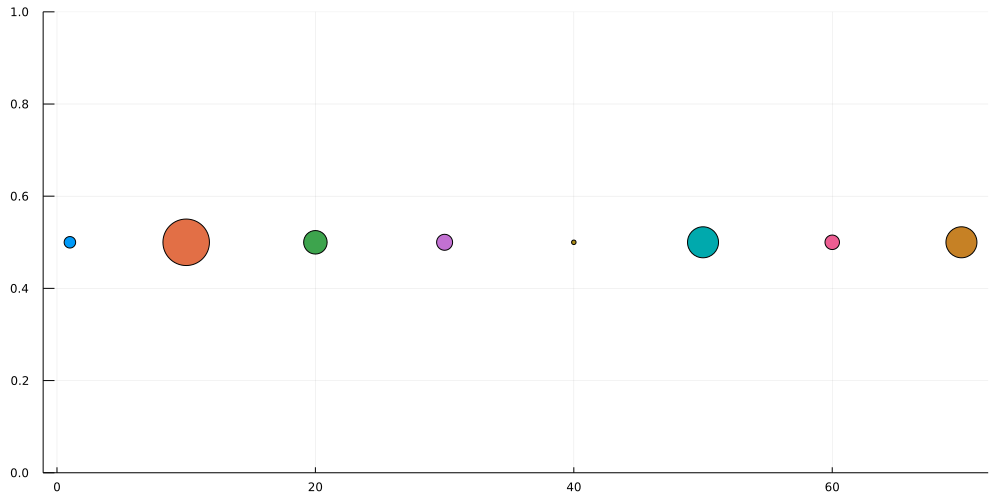

In [102]:
using Plots;
plot!()
scatter([1],[0.5],markersize= p3_3_E[1]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([10],[0.5],markersize= p3_3_E[2]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([20],[0.5],markersize= p3_3_E[3]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([30],[0.5],markersize= p3_3_E[4]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([40],[0.5],markersize= p3_3_E[5]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([50],[0.5],markersize= p3_3_E[6]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([60],[0.5],markersize= p3_3_E[7]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([70],[0.5],markersize= p3_3_E[8]*100,legend = false,size=(500,500),ylims=(0,1))
plot!(size=(1000,500))

## Computing the circuit with the bit-flip error gate N=3, depth = 4

In [103]:
using ITensors
sites3 = siteinds("S=1/2",N3)
p3_4_E = zeros(8)
for i in 1:3:24
    states3 = TT3[i:i+2]
    x3 = productMPS(sites3, states3)
    ii = i÷3 + 1
    #println(ii)
    #println(xxx)
    # Here is where the width and depth matters
    A3_4_E = dot(x3,ψ3_4_E) 
    #println("Amplitude : ",A)
    p3_4_E[ii] = real(A3_4_E)^2 + imag(A3_4_E)^2
    #println("Probability : ",p)
end

In [104]:
println("probability for each base state <x| = ",p3_4_E)

probability for each base state <x| = [0.1880184304066953, 0.02080252996483472, 0.13412922113760023, 0.002011897676205152, 0.03141978104337232, 0.007243590128941883, 0.6012995422040104, 0.01507500743833897]


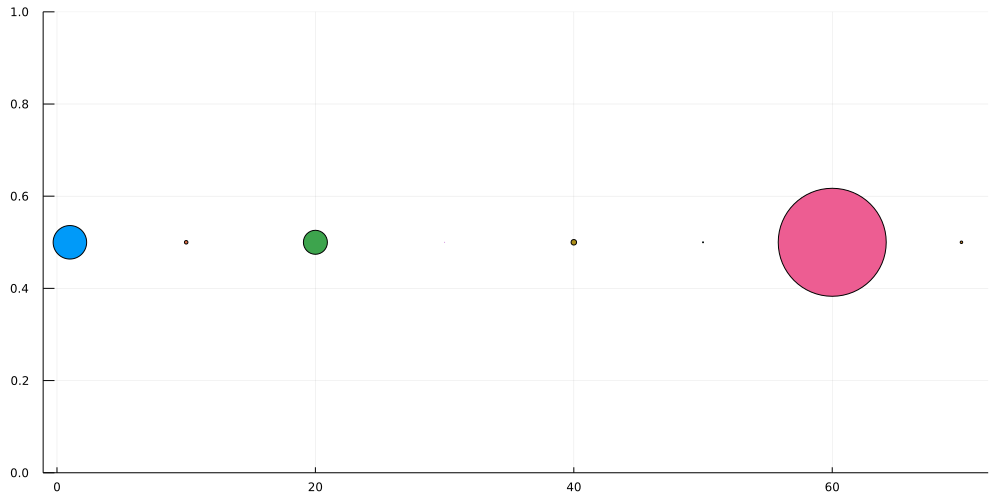

In [106]:
using Plots;
plot!()
scatter([1],[0.5],markersize= p3_4_E[1]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([10],[0.5],markersize= p3_4_E[2]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([20],[0.5],markersize= p3_4_E[3]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([30],[0.5],markersize= p3_4_E[4]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([40],[0.5],markersize= p3_4_E[5]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([50],[0.5],markersize= p3_4_E[6]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([60],[0.5],markersize= p3_4_E[7]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([70],[0.5],markersize= p3_4_E[8]*100,legend = false,size=(500,500),ylims=(0,1))
plot!(size=(1000,500))

## Computing the circuit with the bit-flip error gate N=3, depth = 5

In [107]:
using ITensors
sites3 = siteinds("S=1/2",N3)
p3_5_E = zeros(8)
for i in 1:3:24
    states3 = TT3[i:i+2]
    x3 = productMPS(sites3, states3)
    ii = i÷3 + 1
    #println(ii)
    #println(xxx)
    # Here is where the width and depth matters
    A3_5_E = dot(x3,ψ3_5_E) 
    #println("Amplitude : ",A)
    p3_5_E[ii] = real(A3_5_E)^2 + imag(A3_5_E)^2
    #println("Probability : ",p)
end

In [108]:
println("probability for each base state <x| = ",p3_5_E)

probability for each base state <x| = [0.08064337159035992, 0.014280990410287426, 0.05848822742964668, 0.006473907712552134, 0.2459249878204725, 0.22498033503849074, 0.006453961071788807, 0.36275421892640536]


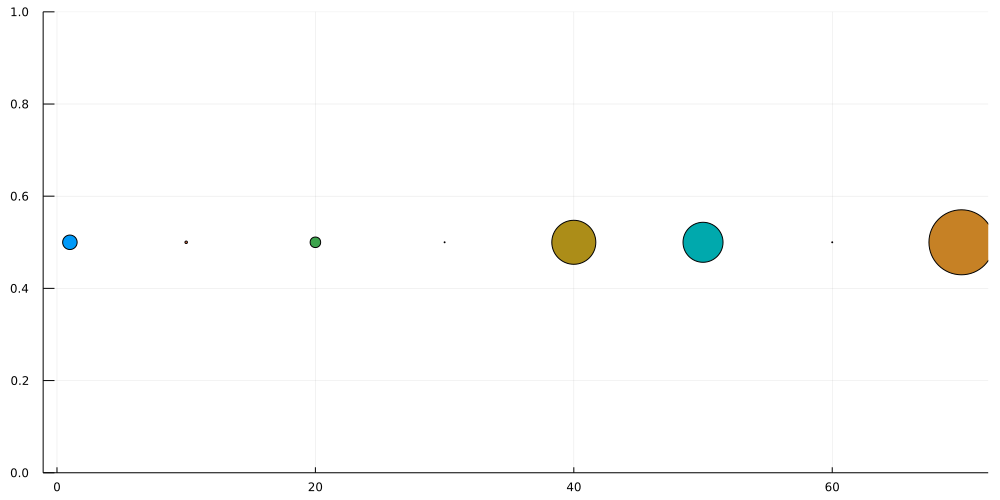

In [109]:
using Plots;
plot!()
scatter([1],[0.5],markersize= p3_5_E[1]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([10],[0.5],markersize= p3_5_E[2]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([20],[0.5],markersize= p3_5_E[3]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([30],[0.5],markersize= p3_5_E[4]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([40],[0.5],markersize= p3_5_E[5]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([50],[0.5],markersize= p3_5_E[6]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([60],[0.5],markersize= p3_5_E[7]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([70],[0.5],markersize= p3_5_E[8]*100,legend = false,size=(500,500),ylims=(0,1))
plot!(size=(1000,500))

## All plots toguether with bit-flip error gate cases [N=3,D=3], [N=3,D=4],[N-3,D=5]

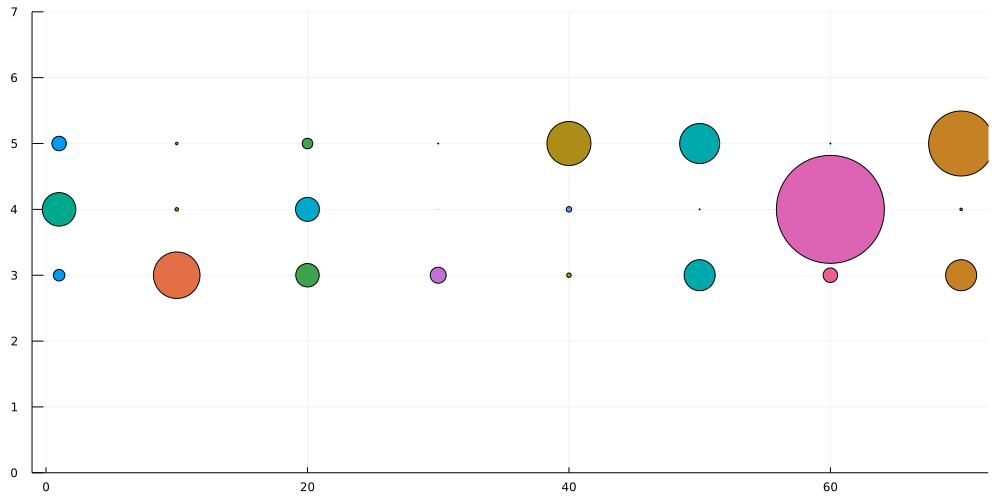

In [113]:
using Plots;
plot!()
scatter([1],[3],markersize= p3_3_E[1]*100,legend = false,size=(500,500),ylims=(0,7))
scatter!([10],[3],markersize= p3_3_E[2]*100,legend = false,size=(500,500),ylims=(0,7))
scatter!([20],[3],markersize= p3_3_E[3]*100,legend = false,size=(500,500),ylims=(0,7))
scatter!([30],[3],markersize= p3_3_E[4]*100,legend = false,size=(500,500),ylims=(0,7))
scatter!([40],[3],markersize= p3_3_E[5]*100,legend = false,size=(500,500),ylims=(0,7))
scatter!([50],[3],markersize= p3_3_E[6]*100,legend = false,size=(500,500),ylims=(0,7))
scatter!([60],[3],markersize= p3_3_E[7]*100,legend = false,size=(500,500),ylims=(0,7))
scatter!([70],[3],markersize= p3_3_E[8]*100,legend = false,size=(500,500),ylims=(0,7))
###
scatter!([1],[4],markersize= p3_4_E[1]*100,legend = false,size=(500,500),ylims=(0,7))
scatter!([10],[4],markersize= p3_4_E[2]*100,legend = false,size=(500,500),ylims=(0,7))
scatter!([20],[4],markersize= p3_4_E[3]*100,legend = false,size=(500,500),ylims=(0,7))
scatter!([30],[4],markersize= p3_4_E[4]*100,legend = false,size=(500,500),ylims=(0,7))
scatter!([40],[4],markersize= p3_4_E[5]*100,legend = false,size=(500,500),ylims=(0,7))
scatter!([50],[4],markersize= p3_4_E[6]*100,legend = false,size=(500,500),ylims=(0,7))
scatter!([60],[4],markersize= p3_4_E[7]*100,legend = false,size=(500,500),ylims=(0,7))
scatter!([70],[4],markersize= p3_4_E[8]*100,legend = false,size=(500,500),ylims=(0,7))
###
scatter!([1],[5],markersize= p3_5_E[1]*100,legend = false,size=(500,500),ylims=(0,7))
scatter!([10],[5],markersize= p3_5_E[2]*100,legend = false,size=(500,500),ylims=(0,7))
scatter!([20],[5],markersize= p3_5_E[3]*100,legend = false,size=(500,500),ylims=(0,7))
scatter!([30],[5],markersize= p3_5_E[4]*100,legend = false,size=(500,500),ylims=(0,7))
scatter!([40],[5],markersize= p3_5_E[5]*100,legend = false,size=(500,500),ylims=(0,7))
scatter!([50],[5],markersize= p3_5_E[6]*100,legend = false,size=(500,500),ylims=(0,7))
scatter!([60],[5],markersize= p3_5_E[7]*100,legend = false,size=(500,500),ylims=(0,7))
scatter!([70],[5],markersize= p3_5_E[8]*100,legend = false,size=(500,500),ylims=(0,7))
plot!(size=(1000,500))

## Computing the circuit with the bit-flip error gate [N=4, D=4]

In [92]:
using ITensors
N = 4
sitesE = siteinds("S=1/2",N)
#p{Float64}(nothing, 16)
#p{Float64}(undef,16)
pE = zeros(16)
for i in 1:4:64
    #println(i)
    #print(TT[i:i+3])
    statesE = TT[i:i+3]
    xE = productMPS(sitesE, statesE)
    ii = i÷4 + 1
    #println(ii)
    #println(xxx)
    AE = dot(xE,ψ4_4_E) 
    #println("Amplitude : ",A)
    pE[ii] = real(AE)^2 + imag(AE)^2
    #println("Probability : ",p)
end

In [93]:
println("probability for each base state <x| = ",pE)

16-element Vector{Float64}:
 0.0030876847099056744
 0.03481435025333333
 0.004135348264872374
 0.14884763736979587
 0.01102357178209338
 0.06563601600603892
 0.006468345566663017
 0.1700398215301648
 4.637365848249172e-5
 0.053552885422306275
 0.007187747989896946
 0.032448204693771805
 0.019396106373431244
 0.13286513830797886
 0.009572794786743513
 0.3008779732845185

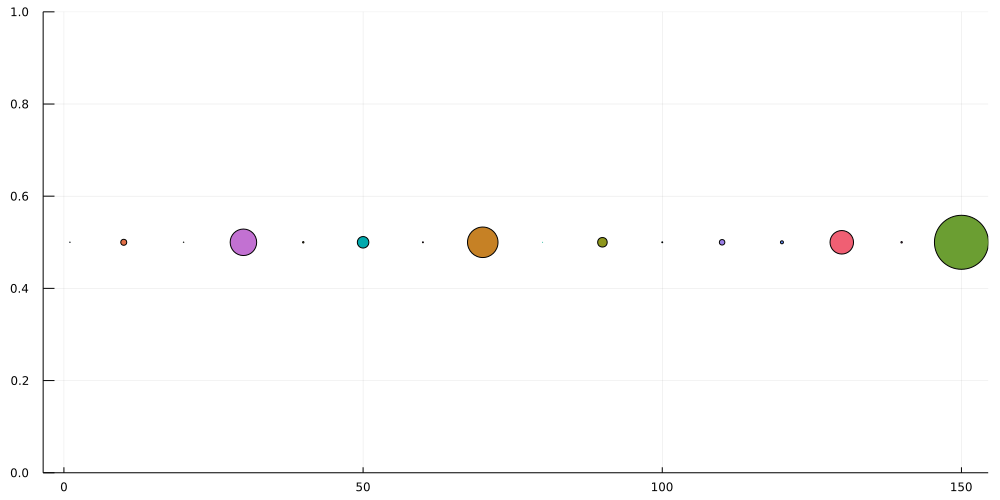

In [98]:
using Plots;
plot!()
scatter([1],[0.5],markersize= pE[1]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([10],[0.5],markersize= pE[2]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([20],[0.5],markersize= pE[3]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([30],[0.5],markersize= pE[4]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([40],[0.5],markersize= pE[5]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([50],[0.5],markersize= pE[6]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([60],[0.5],markersize= pE[7]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([70],[0.5],markersize= pE[8]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([80],[0.5],markersize= pE[9]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([90],[0.5],markersize= pE[10]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([100],[0.5],markersize= pE[11]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([110],[0.5],markersize= pE[12]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([120],[0.5],markersize= pE[13]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([130],[0.5],markersize= pE[14]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([140],[0.5],markersize= pE[15]*100,legend = false,size=(500,500),ylims=(0,1))
scatter!([150],[0.5],markersize= pE[16]*100,legend = false,size=(500,500),ylims=(0,1))
plot!(size=(1000,500))

## Conclusion of task 2:
I observe that the inclusion of an error into the quantum circuit destroy the pattern formation on the probabilities of the systemn to be in a particular state.

## Task 3
Demonstrate the convergence of the empirical cumula- tive distribution function of p to the exact CDF of the exponential distribution with increasing circuit depth.

In [133]:
function Exp_CDF(N, p)
   E_CDF = (1-exp(-2^N*p)) 
end

0.5506710358827784

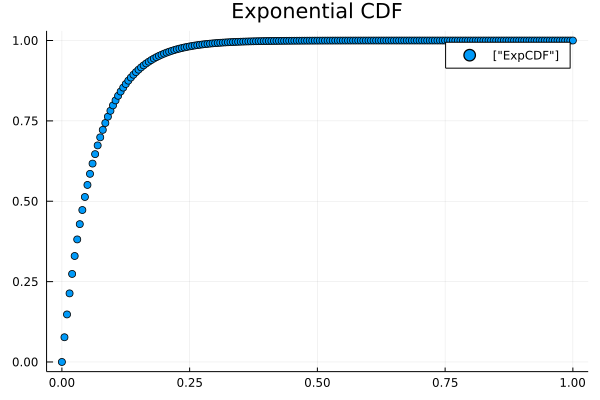

In [154]:
pp = [0:0.005:1;]
E_CDFv= zeros(length(pp))
for i= 1:length(pp)
    E_CDFv[i] = Exp_CDF(4,pp[i])
    #print(i)
    #print(E_CDFv)
end
#plot(E_CDFv) 
plot(pp, E_CDFv, seriestype = :scatter, title = "Exponential CDF",labels=["ExpCDF"])

## Exploring the N=4 D=500 circuit

In [155]:
# N= 4 D = 500
using ITensors

N4 = 4
depth500 = 500
ψ4_500 = run(N4, depth500)

sites500 = siteinds("S=1/2",N4)
#p{Float64}(nothing, 16)
#p{Float64}(undef,16)
p4_500 = zeros(16)
for i in 1:4:64
    #println(i)
    #print(TT[i:i+3])
    states500 = TT4[i:i+3]
    x500 = productMPS(sites500, states500)
    ii = i÷4 + 1
    #println(ii)
    #println(xxx)
    # Here is where the width and depth matters
    A4_500 = dot(x500,ψ4_500) 
    #println("Amplitude : ",A)
    p4_500[ii] = real(A4_500)^2 + imag(A4_500)^2
    #println("Probability : ",p)
end

In [156]:
println("probability for each base state <x| = ",p4_500)

probability for each base state <x| = [0.006827802282168327, 0.054211949291038744, 0.0020937120377898344, 0.09356513390646932, 0.1757165458965228, 0.03975821942597887, 0.01792592966869727, 0.07644082828525639, 0.030063635349383173, 0.2162870858688266, 0.02398920925699686, 0.08529895579295357, 0.0007897724655309973, 0.03110587320294724, 0.026805007293584177, 0.1191203399758653]


In [ ]:
using Plots;
plot()
scatter([0.5],[0.5],markersize=10,size=(500,500),xlims=(0,17),ylims=(0,1))


x1 = Array(1.0:1:16.0)
y1 = ones(16)
println(x1)
println(y1)
pT = transpose(p*100)
for s in pT
   scatter(x1,y1,markersize=pT, label="$pT")
end
plot!(size=(500,500))

In [19]:
[0.5:1:0.5*16]

1-element Vector{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}}}:
 0.5:1.0:7.5

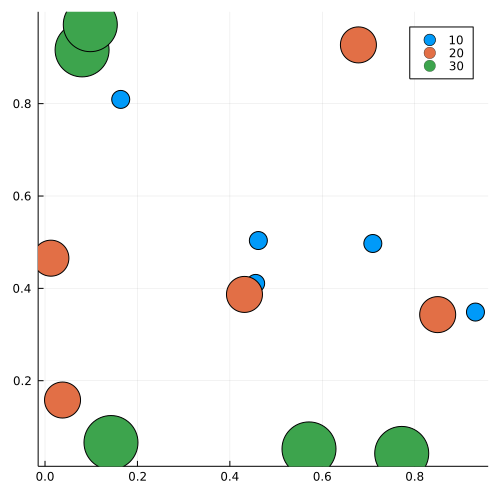

In [16]:
using Plots;
plot()
for s in [ 10, 20, 30 ]
         scatter!(rand(5),rand(5),markersize=s,label="$s")
end
plot!(size=(500,500))

In [5]:
ψ

ITensors.MPS
[1] IndexSet{2} (dim=2|id=219|"Qubit,Site,n=1") (dim=2|id=53|"Link,fact")
[2] IndexSet{3} (dim=2|id=53|"Link,fact") (dim=2|id=544|"Qubit,Site,n=2") (dim=4|id=491|"Link,fact")
[3] IndexSet{3} (dim=2|id=506|"Qubit,Site,n=3") (dim=4|id=491|"Link,fact") (dim=2|id=761|"Link,fact")
[4] IndexSet{2} (dim=2|id=761|"Link,fact") (dim=2|id=407|"Qubit,Site,n=4")


In [173]:
M = [["Up","Up","Up","Up"],["Up","Up","Up","Dn"]]

2-element Vector{Vector{String}}:
 ["Up", "Up", "Up", "Up"]
 ["Up", "Up", "Up", "Dn"]

In [215]:
# Creating all possible combinations of the base states |x> for N qubits
N= 4
Q = lpad.(string.(0:2^N-1;base=2),N,'0').|>s->Int.(collect(s).-48)
# Expressing the binary matrix in the "Up" and "Dn" notation
Qu = replace.(Q, 1 => "Up")
QS = replace.(Qu, 0 => "Dn")

16-element Vector{Vector{Any}}:
 ["Dn", "Dn", "Dn", "Dn"]
 ["Dn", "Dn", "Dn", "Up"]
 ["Dn", "Dn", "Up", "Dn"]
 ["Dn", "Dn", "Up", "Up"]
 ["Dn", "Up", "Dn", "Dn"]
 ["Dn", "Up", "Dn", "Up"]
 ["Dn", "Up", "Up", "Dn"]
 ["Dn", "Up", "Up", "Up"]
 ["Up", "Dn", "Dn", "Dn"]
 ["Up", "Dn", "Dn", "Up"]
 ["Up", "Dn", "Up", "Dn"]
 ["Up", "Dn", "Up", "Up"]
 ["Up", "Up", "Dn", "Dn"]
 ["Up", "Up", "Dn", "Up"]
 ["Up", "Up", "Up", "Dn"]
 ["Up", "Up", "Up", "Up"]

In [217]:
for i=1:size(QS,1)
    println(QS[i,:])
end


Vector{Any}[["Dn", "Dn", "Dn", "Dn"]]
Vector{Any}[["Dn", "Dn", "Dn", "Up"]]
Vector{Any}[["Dn", "Dn", "Up", "Dn"]]
Vector{Any}[["Dn", "Dn", "Up", "Up"]]
Vector{Any}[["Dn", "Up", "Dn", "Dn"]]
Vector{Any}[["Dn", "Up", "Dn", "Up"]]
Vector{Any}[["Dn", "Up", "Up", "Dn"]]
Vector{Any}[["Dn", "Up", "Up", "Up"]]
Vector{Any}[["Up", "Dn", "Dn", "Dn"]]
Vector{Any}[["Up", "Dn", "Dn", "Up"]]
Vector{Any}[["Up", "Dn", "Up", "Dn"]]
Vector{Any}[["Up", "Dn", "Up", "Up"]]
Vector{Any}[["Up", "Up", "Dn", "Dn"]]
Vector{Any}[["Up", "Up", "Dn", "Up"]]
Vector{Any}[["Up", "Up", "Up", "Dn"]]
Vector{Any}[["Up", "Up", "Up", "Up"]]


In [244]:
println(QS[1,:])
TrueState = ["Up", "Up" , "Up", "Up"]

Vector{Any}[["Dn", "Dn", "Dn", "Dn"]]


4-element Vector{String}:
 "Up"
 "Up"
 "Up"
 "Up"

In [295]:
pp = zeros(16)

16-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

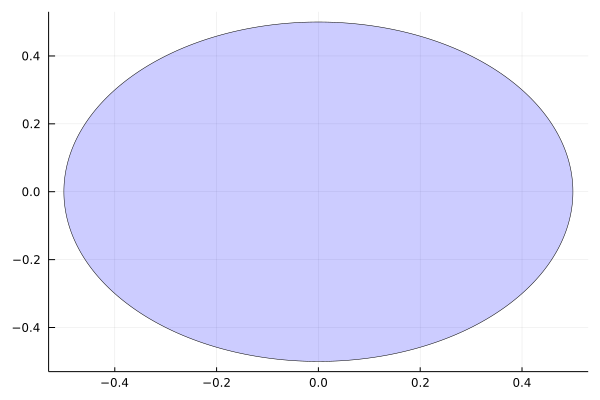

In [350]:
using Plots; gr()
function circleShape(h,k,r)
    theta = LinRange(0, 2*pi, 500)
    h .+ r*sin.(theta),k .+ r*cos.(theta)
end
# circleShape(h,k,r) wwhere (h,k) is the center of the circle and r the radious.
plot(circleShape(0,0,0.5), seriestype = [:shape,], lw =0.5,
        c= :blue, linecolor = :black,
        legend = false, fillalpha = 0.2, aspect_radio =1)

In [269]:
xxx

LoadError: UndefVarError: xxx not defined

In [260]:
r = 1:3:30
r.step

3

In [253]:
transpose(Q)

1×16 transpose(::Vector{Vector{Int64}}) with eltype LinearAlgebra.Transpose{Int64, Vector{Int64}}:
 [0 0 0 0]  [0 0 0 1]  [0 0 1 0]  …  [1 1 0 1]  [1 1 1 0]  [1 1 1 1]

In [8]:
N = 4
sites = siteinds("S=1/2",N)
states = [isodd(n) ? "Up" : "Dn" for n=1:N]
x = productMPS(sites,states)

LoadError: UndefVarError: siteinds not defined

In [233]:
for i=1:size(QS,1)
    sites = siteinds("S=1/2",N)
    states = QS[i,:]
    println(states)
end

Vector{Any}[["Dn", "Dn", "Dn", "Dn"]]
Vector{Any}[["Dn", "Dn", "Dn", "Up"]]
Vector{Any}[["Dn", "Dn", "Up", "Dn"]]
Vector{Any}[["Dn", "Dn", "Up", "Up"]]
Vector{Any}[["Dn", "Up", "Dn", "Dn"]]
Vector{Any}[["Dn", "Up", "Dn", "Up"]]
Vector{Any}[["Dn", "Up", "Up", "Dn"]]
Vector{Any}[["Dn", "Up", "Up", "Up"]]
Vector{Any}[["Up", "Dn", "Dn", "Dn"]]
Vector{Any}[["Up", "Dn", "Dn", "Up"]]
Vector{Any}[["Up", "Dn", "Up", "Dn"]]
Vector{Any}[["Up", "Dn", "Up", "Up"]]
Vector{Any}[["Up", "Up", "Dn", "Dn"]]
Vector{Any}[["Up", "Up", "Dn", "Up"]]
Vector{Any}[["Up", "Up", "Up", "Dn"]]
Vector{Any}[["Up", "Up", "Up", "Up"]]


In [254]:
Q[1,:]
transpose(Q)
QQu = replace.(Q, 1 => "Up")

16-element Vector{Vector{Any}}:
 [0, 0, 0, 0]
 [0, 0, 0, "Up"]
 [0, 0, "Up", 0]
 [0, 0, "Up", "Up"]
 [0, "Up", 0, 0]
 [0, "Up", 0, "Up"]
 [0, "Up", "Up", 0]
 [0, "Up", "Up", "Up"]
 ["Up", 0, 0, 0]
 ["Up", 0, 0, "Up"]
 ["Up", 0, "Up", 0]
 ["Up", 0, "Up", "Up"]
 ["Up", "Up", 0, 0]
 ["Up", "Up", 0, "Up"]
 ["Up", "Up", "Up", 0]
 ["Up", "Up", "Up", "Up"]

In [229]:
N = 4

for i=1:size(QS,1)
   sites = siteinds("S=1/2",N) 
   states = QS[i,:]
   xxx = productMPS(sites, states) 
   #A[i] = dot(xxx,ψ) 
   #println(A[i]) 
end



LoadError: DimensionMismatch("Number of sites and and initial states don't match")

In [170]:
N = 4
sites = siteinds("S=1/2",N)
states = ["Up", "Up" , "Up", "Up"]
xx = productMPS(sites,states)

MPS
[1] IndexSet{2} (dim=2|id=710|"S=1/2,Site,n=1") (dim=1|id=734|"Link,l=1")
[2] IndexSet{3} (dim=1|id=734|"Link,l=1") (dim=2|id=420|"S=1/2,Site,n=2") (dim=1|id=290|"Link,l=2")
[3] IndexSet{3} (dim=1|id=290|"Link,l=2") (dim=2|id=439|"S=1/2,Site,n=3") (dim=1|id=307|"Link,l=3")
[4] IndexSet{2} (dim=1|id=307|"Link,l=3") (dim=2|id=155|"S=1/2,Site,n=4")


In [218]:
sites

4-element Vector{Index{Int64}}:
 (dim=2|id=710|"S=1/2,Site,n=1")
 (dim=2|id=420|"S=1/2,Site,n=2")
 (dim=2|id=439|"S=1/2,Site,n=3")
 (dim=2|id=155|"S=1/2,Site,n=4")

In [171]:
states

4-element Vector{String}:
 "Up"
 "Up"
 "Up"
 "Up"

In [160]:
a = dot(x,ψ)

-0.11451563326169502 + 0.19776667358409206im

In [161]:
p = real(a)^2 + imag(a)^2

0.05222548744184385

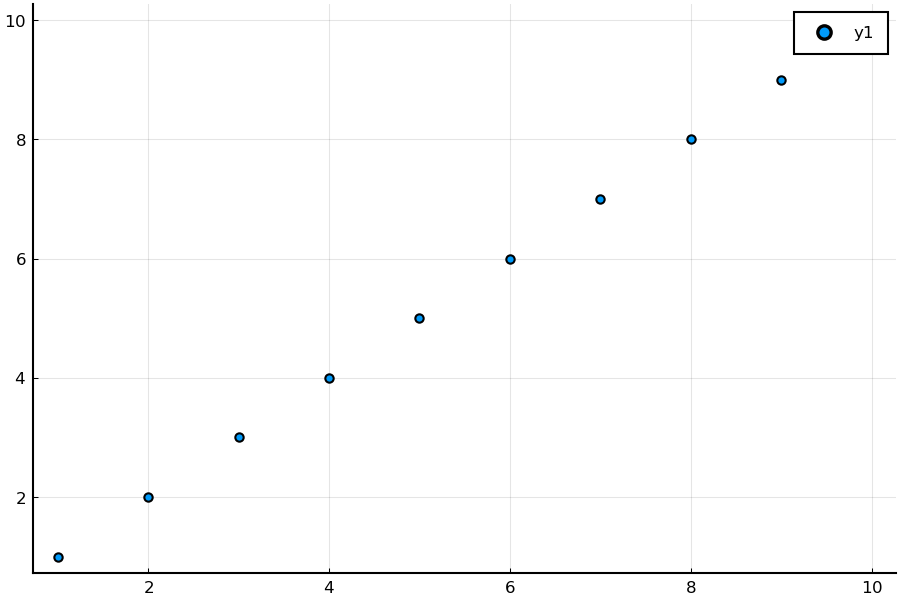

In [182]:
using Plots; 
pyplot()
scatter(1:10, 1:10, dpi = 150)

In [332]:
B=[2.3,5.8]
#int(B)
ceil.(Int, B)

2-element Vector{Int64}:
 3
 6

In [335]:
p*100

16-element Vector{Float64}:
  2.8907151797355946
  4.675959262571748
  7.619035945547406
  8.708944305380149
  8.259013937064166
  0.06584865992732075
  5.444576625499355
 15.15103266831343
  4.129722801597156
  1.214955336597031
  5.222548744184385
  6.550942134197875
  2.905798459125073
  5.575697540718746
  2.837069012353039
 18.74813938718738

In [ ]:
plot()


x1 = Array(1.0:1:16.0)
y1 = ones(16)
println(x1)
println(y1)
pT = transpose(p*100)
for s in pT
   scatter(x1,y1,markersize=p, label="$p")
end
plot!(size=(500,500))

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


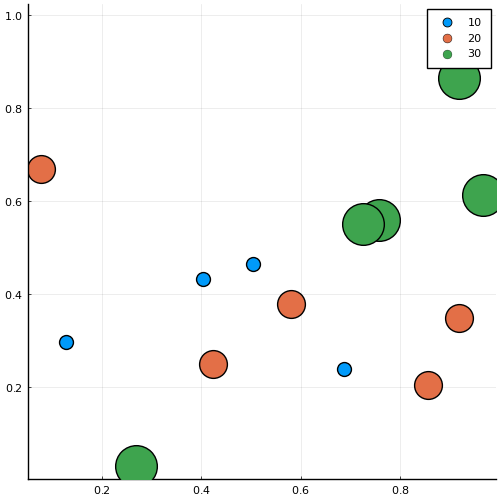

In [224]:
plot()
for s in [ 10, 20, 30 ]
         scatter!(rand(5),rand(5),markersize=s,label="$s")
end
plot!(size=(500,500))

In [165]:
?bin

search: bind binomial combiner combinedind use_combine_contract BigInt begin

Couldn't find bin
Perhaps you meant bind, big, in, min, sin, begin, In, Main, i, run, dim or dir


No documentation found.

Binding `bin` does not exist.


In [163]:
k=4
[ bin(n,k) for n in 0:2^k-1 ]
[ [ bit == '1' ? 1 : 0 for bit in bin(n,k) ] for n in 0:2^k-1 ]

LoadError: UndefVarError: bin not defined

In [188]:
import Base.iterate, Base.length
struct Combinations{T}
    itr::Vector{T}
    count::Int64
    itrsize::Int64
    function Combinations(itr::Vector{T},count::Int) where T
        new{T}(itr, Int64(count), length(itr))
    end
end



LoadError: invalid redefinition of constant Combinations

In [ ]:
function iterate(c::Combinations, state::Int64=0)
    if state>=length(c)
        return nothing
    end
    indices=digits(state, base=c.itrsize,pad=c.count)
    [c.itr[i] for i in (indices .+1)],state+1
end

function length(c::Combinations)
    length(c.itr) ^ c.count
end

In [183]:
collect(Combinations([0,1],3))

LoadError: UndefVarError: Combinations not defined

In [192]:
N=4
reverse.(Iterators.product(fill(0:1,N)...))[:]

16-element Vector{NTuple{4, Int64}}:
 (0, 0, 0, 0)
 (0, 0, 0, 1)
 (0, 0, 1, 0)
 (0, 0, 1, 1)
 (0, 1, 0, 0)
 (0, 1, 0, 1)
 (0, 1, 1, 0)
 (0, 1, 1, 1)
 (1, 0, 0, 0)
 (1, 0, 0, 1)
 (1, 0, 1, 0)
 (1, 0, 1, 1)
 (1, 1, 0, 0)
 (1, 1, 0, 1)
 (1, 1, 1, 0)
 (1, 1, 1, 1)

In [193]:
N=3
lpad.(string.(0:N^N-1;base=N),N,'0').|>s->Int.(collect(s).-48)

27-element Vector{Vector{Int64}}:
 [0, 0, 0]
 [0, 0, 1]
 [0, 0, 2]
 [0, 1, 0]
 [0, 1, 1]
 [0, 1, 2]
 [0, 2, 0]
 [0, 2, 1]
 [0, 2, 2]
 [1, 0, 0]
 [1, 0, 1]
 [1, 0, 2]
 [1, 1, 0]
 ⋮
 [1, 2, 0]
 [1, 2, 1]
 [1, 2, 2]
 [2, 0, 0]
 [2, 0, 1]
 [2, 0, 2]
 [2, 1, 0]
 [2, 1, 1]
 [2, 1, 2]
 [2, 2, 0]
 [2, 2, 1]
 [2, 2, 2]

In [50]:
N=3
Q = lpad.(string.(0:2^N-1;base=2),N,'0').|>s->Int.(collect(s).-48)
#string.(0:2^N-1;base=2)

8-element Vector{Vector{Int64}}:
 [0, 0, 0]
 [0, 0, 1]
 [0, 1, 0]
 [0, 1, 1]
 [1, 0, 0]
 [1, 0, 1]
 [1, 1, 0]
 [1, 1, 1]

In [51]:
QS = replace.(Q, 1 => "Up")
QS = replace.(QS, 0 => "Dn")

8-element Vector{Vector{Any}}:
 ["Dn", "Dn", "Dn"]
 ["Dn", "Dn", "Up"]
 ["Dn", "Up", "Dn"]
 ["Dn", "Up", "Up"]
 ["Up", "Dn", "Dn"]
 ["Up", "Dn", "Up"]
 ["Up", "Up", "Dn"]
 ["Up", "Up", "Up"]

## Quantum state tomography

In [36]:
# Set parameters
#N = 4                           # Number of qubits
#depth = 4                       # Depth of random circuit
nshots = 1000                   # Number of measurements
#gates = randomcircuit(N, depth) # Build gates

1000

In [73]:
data, ψ = getsamples(N, gates, nshots)

(["Z" => 0 "Z" => 1 "X" => 1 "Y" => 0; "X" => 0 "X" => 0 "Z" => 1 "Z" => 0; … ; "X" => 0 "X" => 0 "X" => 0 "Z" => 0; "Z" => 1 "X" => 0 "Z" => 1 "X" => 1], MPS
[1] IndexSet{2} (dim=2|id=650|"Qubit,Site,n=1") (dim=2|id=679|"Link,fact")
[2] IndexSet{3} (dim=2|id=904|"Qubit,Site,n=2") (dim=2|id=679|"Link,fact") (dim=4|id=716|"Link,fact")
[3] IndexSet{3} (dim=4|id=716|"Link,fact") (dim=2|id=396|"Qubit,Site,n=3") (dim=2|id=462|"Link,fact")
[4] IndexSet{2} (dim=2|id=654|"Qubit,Site,n=4") (dim=2|id=462|"Link,fact")
)

In [110]:
data

1000×4 Matrix{Pair{String, Int64}}:
 "Z"=>0  "Z"=>1  "X"=>1  "Y"=>0
 "X"=>0  "X"=>0  "Z"=>1  "Z"=>0
 "Y"=>0  "Y"=>0  "Y"=>0  "Y"=>1
 "X"=>0  "Z"=>1  "X"=>1  "Y"=>1
 "Z"=>0  "Y"=>0  "X"=>0  "Z"=>1
 "Y"=>0  "Z"=>1  "Y"=>1  "Y"=>0
 "Z"=>0  "Y"=>1  "Y"=>1  "Y"=>1
 "Z"=>0  "Z"=>0  "Y"=>0  "X"=>1
 "X"=>1  "X"=>0  "Z"=>1  "X"=>1
 "Y"=>0  "Y"=>0  "Z"=>0  "X"=>1
 "Y"=>0  "Y"=>0  "Y"=>0  "Z"=>0
 "X"=>1  "Y"=>0  "Z"=>0  "X"=>1
 "Y"=>0  "Y"=>0  "X"=>0  "Z"=>1
    ⋮                    
 "X"=>1  "Y"=>0  "Z"=>0  "X"=>1
 "Z"=>1  "Y"=>0  "Y"=>1  "Y"=>1
 "Y"=>0  "Z"=>1  "Y"=>1  "Y"=>0
 "X"=>0  "X"=>1  "Z"=>1  "Z"=>0
 "Y"=>1  "X"=>0  "X"=>1  "Z"=>1
 "Z"=>1  "Y"=>1  "Z"=>1  "Y"=>0
 "Y"=>1  "Y"=>1  "X"=>0  "Z"=>0
 "X"=>1  "Z"=>1  "Y"=>1  "Y"=>0
 "Y"=>1  "Y"=>0  "X"=>1  "Y"=>1
 "Z"=>0  "Y"=>0  "X"=>0  "Z"=>1
 "X"=>0  "X"=>0  "X"=>0  "Z"=>0
 "Z"=>1  "X"=>0  "Z"=>1  "X"=>1

In [112]:
data_Z, ψ_Z = getsamples(N, gates, nshots,local_basis = ["Z"])


(["Z" => 0 "Z" => 1 "Z" => 0 "Z" => 1; "Z" => 1 "Z" => 1 "Z" => 1 "Z" => 1; … ; "Z" => 0 "Z" => 0 "Z" => 1 "Z" => 0; "Z" => 1 "Z" => 1 "Z" => 0 "Z" => 0], MPS
[1] IndexSet{2} (dim=2|id=404|"Qubit,Site,n=1") (dim=2|id=15|"Link,fact")
[2] IndexSet{3} (dim=2|id=35|"Qubit,Site,n=2") (dim=2|id=15|"Link,fact") (dim=4|id=328|"Link,fact")
[3] IndexSet{3} (dim=4|id=328|"Link,fact") (dim=2|id=756|"Qubit,Site,n=3") (dim=2|id=222|"Link,fact")
[4] IndexSet{2} (dim=2|id=642|"Qubit,Site,n=4") (dim=2|id=222|"Link,fact")
)

In [113]:
data_Z

1000×4 Matrix{Pair{String, Int64}}:
 "Z"=>0  "Z"=>1  "Z"=>0  "Z"=>1
 "Z"=>1  "Z"=>1  "Z"=>1  "Z"=>1
 "Z"=>1  "Z"=>0  "Z"=>1  "Z"=>1
 "Z"=>1  "Z"=>1  "Z"=>1  "Z"=>0
 "Z"=>1  "Z"=>1  "Z"=>0  "Z"=>0
 "Z"=>1  "Z"=>0  "Z"=>1  "Z"=>0
 "Z"=>1  "Z"=>1  "Z"=>1  "Z"=>0
 "Z"=>1  "Z"=>1  "Z"=>0  "Z"=>0
 "Z"=>0  "Z"=>1  "Z"=>1  "Z"=>1
 "Z"=>1  "Z"=>0  "Z"=>1  "Z"=>1
 "Z"=>1  "Z"=>1  "Z"=>1  "Z"=>0
 "Z"=>1  "Z"=>1  "Z"=>0  "Z"=>0
 "Z"=>0  "Z"=>0  "Z"=>0  "Z"=>0
    ⋮                    
 "Z"=>0  "Z"=>0  "Z"=>1  "Z"=>0
 "Z"=>1  "Z"=>0  "Z"=>1  "Z"=>1
 "Z"=>0  "Z"=>0  "Z"=>0  "Z"=>0
 "Z"=>1  "Z"=>1  "Z"=>1  "Z"=>1
 "Z"=>0  "Z"=>0  "Z"=>0  "Z"=>0
 "Z"=>1  "Z"=>1  "Z"=>0  "Z"=>1
 "Z"=>0  "Z"=>1  "Z"=>0  "Z"=>1
 "Z"=>1  "Z"=>1  "Z"=>1  "Z"=>0
 "Z"=>1  "Z"=>0  "Z"=>1  "Z"=>1
 "Z"=>1  "Z"=>0  "Z"=>1  "Z"=>1
 "Z"=>0  "Z"=>0  "Z"=>1  "Z"=>0
 "Z"=>1  "Z"=>1  "Z"=>0  "Z"=>0

In [130]:
import Pkg; Pkg.add("ITensors")

In [3]:
using PastaQ

N = 4   # Number of qubits

# Building a circuit data-structure
gates = [("X" , 1),                        # Pauli X on qubit 1
         ("CX", (1, 3)),                   # Controlled-X on qubits [1,3]
         ("Rx", 2, (θ=0.5,)),              # Rotation of θ around X
         ("Rn", 3, (θ=0.5, ϕ=0.2, λ=1.2)), # Arbitrary rotation with angles (θ,ϕ,λ)
         ("√SWAP", (3, 4)),                # Sqrt Swap on qubits [2,3]
         ("T" , 4)]                        # T gate on qubit 4

# Returns the MPS at the output of the quantum circuit: `|ψ⟩ = Û|0,0,…,0⟩`
# First the gate ("X" , 1) is applied, then ("CX", (1, 3)), etc.
ψ = runcircuit(N, gates)
# This is equivalent to:
# julia> ψ0 = qubits(N) # Initialize |ψ⟩ to |0,0,…⟩
# julia> ψ = runcircuit(ψ0,gates) # Run the circuit

ITensors.MPS
[1] IndexSet{2} (dim=2|id=648|"Qubit,Site,n=1") (dim=1|id=974|"Link,fact")
[2] IndexSet{3} (dim=1|id=974|"Link,fact") (dim=2|id=555|"Qubit,Site,n=2") (dim=1|id=686|"Link,fact")
[3] IndexSet{3} (dim=2|id=545|"Qubit,Site,n=3") (dim=2|id=313|"Link,fact") (dim=1|id=686|"Link,fact")
[4] IndexSet{2} (dim=2|id=505|"Qubit,Site,n=4") (dim=2|id=313|"Link,fact")


In [106]:
using PastaQ

# Example 1a: random quantum circuit

N = 4     # Number of qubits
depth = 4 # Depth of the circuit

# Generate a random quantum circuit built out of layers of single-qubit random
# rotations + CX gates, alternating between even and of odd layers.
gates = randomcircuit(N, depth)

@show gates

# Returns the MPS at the output of the quantum circuit: `|ψ⟩ = Û|0,0,…,0⟩`
ψ = runcircuit(N, gates)

# Generate the MPO for the unitary circuit:
U = runcircuit(N, gates; process=true)

gates = Vector{var"#s20"} where var"#s20"[Any[("RandomUnitary", (1, 2), (random_matrix = ComplexF64[0.9991938390100242 + 0.23545947105429144im 0.8471275276349396 + 0.7363087546042262im -0.5284427148913899 + 0.8181898398759267im 0.10838085440853112 - 0.3374552682570139im; 0.36303830103350354 - 0.2849072639851861im 1.0977683873600708 + 1.1066039661645766im -0.5235201759051478 + 0.09490078574891307im -0.43718165724727787 + 1.0212650442002857im; -0.6390882375258403 + 0.24257844042037546im -0.12134134151055562 + 0.9945419103657018im -0.17334043987951392 - 1.2747938997610258im 0.11213324428310145 + 0.18466549104290358im; 0.19123743714122443 + 0.3312992746180467im -0.568256037272006 - 0.756038324295267im 0.5714783893461589 - 0.17092862874659112im 0.7382810108981459 + 0.43255663626160934im],)), ("RandomUnitary", (3, 4), (random_matrix = ComplexF64[0.8275245030362267 - 1.1070089272077825im 0.2616555595150274 + 0.5479081498122723im -0.16192820531911362 - 0.02495261370458745im -0.1183346555899653

MPO
[1] IndexSet{3} (dim=2|id=367|"Qubit,Site,n=1")' (dim=2|id=367|"Qubit,Site,n=1") (dim=4|id=663|"Link,fact")
[2] IndexSet{4} (dim=2|id=267|"Qubit,Site,n=2")' (dim=4|id=663|"Link,fact") (dim=2|id=267|"Qubit,Site,n=2") (dim=16|id=186|"Link,fact")
[3] IndexSet{4} (dim=16|id=186|"Link,fact") (dim=2|id=967|"Qubit,Site,n=3")' (dim=2|id=967|"Qubit,Site,n=3") (dim=4|id=428|"Link,fact")
[4] IndexSet{3} (dim=2|id=763|"Qubit,Site,n=4")' (dim=2|id=763|"Qubit,Site,n=4") (dim=4|id=428|"Link,fact")


In [133]:
Pkg.add("PkgTemplates")

In [134]:
test MyITensorsPkg

LoadError: syntax: extra token "MyITensorsPkg" after end of expression

In [135]:
]

In [1]:
println("Hello World")

Hello World


In [9]:
using ITensors
N = 3
s = siteinds("S=1/2", 3);
#M1 = randomMPS(s; linkdims=3);
#norm(M1)

In [156]:
sites

4-element Vector{Index{Int64}}:
 (dim=2|id=270|"S=1/2,Site,n=1")
 (dim=2|id=700|"S=1/2,Site,n=2")
 (dim=2|id=795|"S=1/2,Site,n=3")
 (dim=2|id=445|"S=1/2,Site,n=4")

In [150]:
x

MPS
[1] IndexSet{2} (dim=2|id=270|"S=1/2,Site,n=1") (dim=1|id=644|"Link,l=1")
[2] IndexSet{3} (dim=1|id=644|"Link,l=1") (dim=2|id=700|"S=1/2,Site,n=2") (dim=1|id=517|"Link,l=2")
[3] IndexSet{3} (dim=1|id=517|"Link,l=2") (dim=2|id=795|"S=1/2,Site,n=3") (dim=1|id=330|"Link,l=3")
[4] IndexSet{2} (dim=1|id=330|"Link,l=3") (dim=2|id=445|"S=1/2,Site,n=4")


In [153]:
real(a)^2

0.1433529190419143

In [124]:
using ITensors
N = 10

s = siteinds("S=1/2",N)
psi = randomMPS(s; linkdims=8)
Z = expect(psi,"Sz";site_range=2:6)

LoadError: MethodError: no method matching randomMPS(::Vector{Index{Int64}}; linkdims=8)
[0mClosest candidates are:
[0m  randomMPS(::Vector{var"#s84"} where var"#s84"<:Index) at C:\Users\Jose-Henry\.julia\packages\ITensors\Ligbx\src\mps\mps.jl:192[91m got unsupported keyword argument "linkdims"[39m
[0m  randomMPS(::Vector{var"#s83"} where var"#s83"<:Index, [91m::Int64[39m) at C:\Users\Jose-Henry\.julia\packages\ITensors\Ligbx\src\mps\mps.jl:192[91m got unsupported keyword argument "linkdims"[39m
[0m  randomMPS(::Vector{var"#s84"} where var"#s84"<:Index, [91m::Any[39m) at C:\Users\Jose-Henry\.julia\packages\ITensors\Ligbx\src\mps\mps.jl:204[91m got unsupported keyword argument "linkdims"[39m
[0m  ...

In [75]:
typeof(data)

Matrix{Pair{String, Int64}} (alias for Array{Pair{String, Int64}, 2})

In [84]:
#collect(data)
#Accumulator(data)
data{"X"}

LoadError: TypeError: in Type{...} expression, expected UnionAll, got a value of type Matrix{Pair{String, Int64}}

In [94]:
data

1000×4 Matrix{Pair{String, Int64}}:
 "Z"=>0  "Z"=>1  "X"=>1  "Y"=>0
 "X"=>0  "X"=>0  "Z"=>1  "Z"=>0
 "Y"=>0  "Y"=>0  "Y"=>0  "Y"=>1
 "X"=>0  "Z"=>1  "X"=>1  "Y"=>1
 "Z"=>0  "Y"=>0  "X"=>0  "Z"=>1
 "Y"=>0  "Z"=>1  "Y"=>1  "Y"=>0
 "Z"=>0  "Y"=>1  "Y"=>1  "Y"=>1
 "Z"=>0  "Z"=>0  "Y"=>0  "X"=>1
 "X"=>1  "X"=>0  "Z"=>1  "X"=>1
 "Y"=>0  "Y"=>0  "Z"=>0  "X"=>1
 "Y"=>0  "Y"=>0  "Y"=>0  "Z"=>0
 "X"=>1  "Y"=>0  "Z"=>0  "X"=>1
 "Y"=>0  "Y"=>0  "X"=>0  "Z"=>1
    ⋮                    
 "X"=>1  "Y"=>0  "Z"=>0  "X"=>1
 "Z"=>1  "Y"=>0  "Y"=>1  "Y"=>1
 "Y"=>0  "Z"=>1  "Y"=>1  "Y"=>0
 "X"=>0  "X"=>1  "Z"=>1  "Z"=>0
 "Y"=>1  "X"=>0  "X"=>1  "Z"=>1
 "Z"=>1  "Y"=>1  "Z"=>1  "Y"=>0
 "Y"=>1  "Y"=>1  "X"=>0  "Z"=>0
 "X"=>1  "Z"=>1  "Y"=>1  "Y"=>0
 "Y"=>1  "Y"=>0  "X"=>1  "Y"=>1
 "Z"=>0  "Y"=>0  "X"=>0  "Z"=>1
 "X"=>0  "X"=>0  "X"=>0  "Z"=>0
 "Z"=>1  "X"=>0  "Z"=>1  "X"=>1

In [103]:
data[:,1]

1000-element Vector{Pair{String, Int64}}:
 "Z" => 0
 "X" => 0
 "Y" => 0
 "X" => 0
 "Z" => 0
 "Y" => 0
 "Z" => 0
 "Z" => 0
 "X" => 1
 "Y" => 0
 "Y" => 0
 "X" => 1
 "Y" => 0
     ⋮
 "X" => 1
 "Z" => 1
 "Y" => 0
 "X" => 0
 "Y" => 1
 "Z" => 1
 "Y" => 1
 "X" => 1
 "Y" => 1
 "Z" => 0
 "X" => 0
 "Z" => 1

In [105]:
eachrow(data)

Base.Generator{Base.OneTo{Int64}, Base.var"#191#192"{Matrix{Pair{String, Int64}}}}(Base.var"#191#192"{Matrix{Pair{String, Int64}}}(["Z" => 0 "Z" => 1 "X" => 1 "Y" => 0; "X" => 0 "X" => 0 "Z" => 1 "Z" => 0; … ; "X" => 0 "X" => 0 "X" => 0 "Z" => 0; "Z" => 1 "X" => 0 "Z" => 1 "X" => 1]), Base.OneTo(1000))

In [123]:
using ITensors

#define indices
l = Index(2,"l")

#define tensors
#A = randomITensor(l,m,r)
A = randomITensor(l,2,1)

LoadError: MethodError: no method matching randomITensor(::Index{Int64}, ::Int64, ::Int64)
[0mClosest candidates are:
[0m  randomITensor([91m::Index...[39m) at C:\Users\Jose-Henry\.julia\packages\ITensors\Ligbx\src\itensor.jl:1204

In [120]:
# 2-site gate
function ITensors.op(::OpName"CX", ::SiteType"S=1/2", s1::Index, s2::Index)
  mat = [1 0 0 0
         0 1 0 0
         0 0 0 1
         0 0 1 0]
  return itensor(mat, s2', s1', s2, s1)
end

os = [("CX", 1, 3), ("σz", 3)]

@show os

# Start with the state |↓↑↑⟩
ψ0 = MPS(s, n -> n == 1 ? "↓" : "↑")

# The result is:
# σz₃ CX₁₃ |↓↑↑⟩ = -|↓↑↓⟩
ψ = apply(ops(os, s), ψ0; cutoff = 1e-15)
@show inner(ψ, MPS(s, n -> n == 1 || n == 3 ? "↓" : "↑")) == -1

os = Tuple{String, Int64, Vararg{Int64, N} where N}[("CX", 1, 3), ("σz", 3)]


LoadError: MethodError: no method matching MPS(::Vector{Index{Int64}}, ::var"#15#16")
[0mClosest candidates are:
[0m  MPS(::Any, ::Any, [91m::Any[39m) at C:\Users\Jose-Henry\.julia\packages\ITensors\Ligbx\src\mps\mps.jl:9
[0m  (::Type{MPST})([91m::ITensor[39m, ::Any; leftinds, orthocenter, kwargs...) where MPST<:ITensors.AbstractMPS at C:\Users\Jose-Henry\.julia\packages\ITensors\Ligbx\src\mps\abstractmps.jl:1366
[0m  MPS(::Vector{var"#s84"} where var"#s84"<:Index) at C:\Users\Jose-Henry\.julia\packages\ITensors\Ligbx\src\mps\mps.jl:68

In [66]:
y=rand(1:10,20)

20-element Vector{Int64}:
  7
  1
  4
  5
  8
  4
  5
 10
  7
  3
  4
  7
  8
  6
  3
  6
  6
  7
  1
  9

In [67]:
u=unique(y)

9-element Vector{Int64}:
  7
  1
  4
  5
  8
 10
  3
  6
  9

In [68]:
d=Dict([(i,count(x->x==i,y)) for i in u])

Dict{Int64, Int64} with 9 entries:
  5  => 2
  4  => 3
  6  => 3
  7  => 4
  10 => 1
  9  => 1
  8  => 2
  3  => 2
  1  => 2

In [41]:
using PastaQ

# Example 2: generation of measurement data

# Set parameters
N = 4                           # Number of qubits
depth = 4                       # Depth of random circuit
nshots = 1000                   # Number of measurements
gates = randomcircuit(N, depth) # Build gates


# 2a) Output state of a noiseless circuit. By default, each projective measurement
# is taken in basis randomly drawn from the the Pauli group. Also returns the output MPS.
data, ψ = getsamples(N, gates, nshots)

#  Note: the above is equivalent to:
# > bases = randombases(N, nshots; local_basis = ["X","Y","Z"])
# > ψ = runcircuit(N, gates)
# > data = getsamples(ψ, bases)

# 2b) Output state of a noisy circuit. Also returns the output MPO
data, ρ = getsamples(N, gates, nshots; noise = ("amplitude_damping", (γ = 0.01,)))

(["X" => 1 "Z" => 1 "Y" => 1 "Y" => 1; "Y" => 1 "X" => 0 "X" => 1 "Z" => 0; … ; "Y" => 1 "Z" => 0 "X" => 1 "Y" => 0; "Y" => 0 "Y" => 0 "X" => 1 "Z" => 0], MPO
[1] IndexSet{3} (dim=2|id=478|"Qubit,Site,n=1")' (dim=2|id=478|"Qubit,Site,n=1") (dim=4|id=902|"Link,fact")
[2] IndexSet{4} (dim=2|id=183|"Qubit,Site,n=2")' (dim=4|id=902|"Link,fact") (dim=2|id=183|"Qubit,Site,n=2") (dim=16|id=63|"Link,fact")
[3] IndexSet{4} (dim=2|id=47|"Qubit,Site,n=3")' (dim=4|id=821|"Link,fact") (dim=16|id=63|"Link,fact") (dim=2|id=47|"Qubit,Site,n=3")
[4] IndexSet{3} (dim=2|id=176|"Qubit,Site,n=4")' (dim=2|id=176|"Qubit,Site,n=4") (dim=4|id=821|"Link,fact")
)

In [44]:
ψ

MPS
[1] IndexSet{2} (dim=2|id=736|"Qubit,Site,n=1") (dim=2|id=520|"Link,fact")
[2] IndexSet{3} (dim=2|id=886|"Qubit,Site,n=2") (dim=2|id=520|"Link,fact") (dim=4|id=648|"Link,fact")
[3] IndexSet{3} (dim=4|id=648|"Link,fact") (dim=2|id=135|"Qubit,Site,n=3") (dim=2|id=334|"Link,fact")
[4] IndexSet{2} (dim=2|id=682|"Qubit,Site,n=4") (dim=2|id=334|"Link,fact")


In [40]:
using PastaQ

# Load the training data, as well as the target quantum state from file.
data, target = loadsamples("PATH_TO_DATAFILE.h5")
N = size(data, 2) # Number of qubits

# 1. Reconstruction with a variational wavefunction:
#
# Initialize a variational MPS with bond dimension χ = 10.
ψ0 = randomstate(N; χ = 10)

# Initialize stochastic gradient descent with learning rate η = 0.01
opt = SGD(η = 0.01)

# Run quantum state tomography
ψ = tomography(data, ψ0; optimizer = opt, target = target)

# 2. Reconstruction with a variational density matrix:
#
# Initialize a variational LPDO with bond dimension χ = 10 and Kraus dimension ξ = 2.
ρ0 = randomstate(N; mixed = true, χ = 10, ξ = 2)

# Run quantum state tomography
ρ = tomography(data, ρ0; optimizer = opt, target = target)

LoadError: UndefVarError: loadsamples not defined

In [31]:
i = Index(2, "i")

(dim=2|id=910|"i")

In [32]:
A = randomITensor(i', i)

ITensor ord=2 (dim=2|id=910|"i")' (dim=2|id=910|"i")
NDTensors.Dense{Float64, Vector{Float64}}

In [33]:
@show A;

A = ITensor ord=2
Dim 1: (dim=2|id=910|"i")'
Dim 2: (dim=2|id=910|"i")
NDTensors.Dense{Float64, Vector{Float64}}
 2×2
 -1.0704047437869733  -1.6036108722138445
 -0.5184473438394585  -1.3234497201387745


In [34]:
@show R;

R = MPS
[1] IndexSet{2} (dim=2|id=914|"Qubit,Site,n=1") (dim=2|id=669|"Link,fact")
[2] IndexSet{3} (dim=2|id=669|"Link,fact") (dim=2|id=656|"Qubit,Site,n=2") (dim=4|id=616|"Link,fact")
[3] IndexSet{3} (dim=2|id=159|"Qubit,Site,n=3") (dim=4|id=616|"Link,fact") (dim=2|id=297|"Link,fact")
[4] IndexSet{2} (dim=2|id=297|"Link,fact") (dim=2|id=747|"Qubit,Site,n=4")

